## This is the workbook for Pepperwood Climate Above Ground research
## Author Aji John

Research Proposal - Climate Above Ground Pepperwood

	Introduction .Climate above ground plays an important role in flora and fauna of a particular region. 
    We plan to explore vertical profiles to complement the wireless mesh and hobo networks, and particularly,
    to study the temperatures experienced by plants of different sizes.
	
	Objectives and Research Questions. We propose to study the following 
    1) Diurnal variation of temperatures at various heights  - variation of Tmin/Tmax at various heights
    2) Relate the species found at these sites. - relating it to the range of site data
       - check with Meagan - where the apt site
       
       IR Temp heights 
       Korner Christine
	
	Methods.We plan to carry out in various phases. 
    First, we install iButtons/HOBOs at few of the test sites at different heights 
    to validate the future setup and installation, then, 
    we analyze the data from the initial setup to corroborate our objectives, 
    and finally, we install customized nodes to do long-term monitoring of the sites.

## To visualize temperature profile
Temperature probes at various heights 

In [1]:
# Load the Required Packages
library(raster)
library(leaflet)
library(jsonlite)
library(dplyr)
library(ggplot2)
library(plotly)
library(reshape2)

Loading required package: sp

Attaching package: ‘dplyr’

The following objects are masked from ‘package:raster’:

    intersect, select, union

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘plotly’

The following object is masked from ‘package:ggplot2’:

    last_plot

The following object is masked from ‘package:raster’:

    select

The following object is masked from ‘package:stats’:

    filter

The following object is masked from ‘package:graphics’:

    layout



In [2]:
# Get the metadata of the plots (comparision)
myurl <- "https://raw.githubusercontent.com/ajijohn/geiger/master/data/shield-comparison.txt"
download.file(url=myurl, destfile="./data/ArrayPlotPts.csv", method="wget")
ArrayPlotPts<- read.csv('./data/ArrayPlotPts.csv')
str(ArrayPlotPts)

'data.frame':	85 obs. of  4 variables:
 $ time   : Factor w/ 85 levels "2016/9/8 16:12:31",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ id     : Factor w/ 5 levels "28 23 DE 3 0 0 80 9",..: 4 2 5 1 3 4 2 5 1 3 ...
 $ celsius: num  27.4 23.8 24.9 25.1 25.2 ...
 $ farenh : num  81.3 74.8 76.9 77.2 77.5 ...


Looking at two day data collected in SF for testing. On 9-13, 
no temperature shields , On 9-14,  temperature shields on (commercial ones). 
Would be interesting to see if there are greater temperature variations on 9-13 ?

'data.frame':	8282 obs. of  4 variables:
 $ time   : Factor w/ 8282 levels "2016/9/12 15:56:41",..: 1 2 3 4 5 6 7 10 11 12 ...
 $ id     : Factor w/ 6 levels "28 23 DE 3 0 0 80 9",..: 4 2 5 1 3 6 4 2 5 1 ...
 $ celsius: num  14.8 14.7 15.2 14.8 14.6 ...
 $ farenh : num  58.5 58.4 59.5 58.7 58.3 ...
'data.frame':	8282 obs. of  4 variables:
 $ time   : POSIXct, format: "2016-09-12 15:56:41" "2016-09-12 15:56:44" ...
 $ id     : Factor w/ 6 levels "28 23 DE 3 0 0 80 9",..: 4 2 5 1 3 6 4 2 5 1 ...
 $ celsius: num  14.8 14.7 15.2 14.8 14.6 ...
 $ farenh : num  58.5 58.4 59.5 58.7 58.3 ...


`geom_smooth()` using method = 'gam'


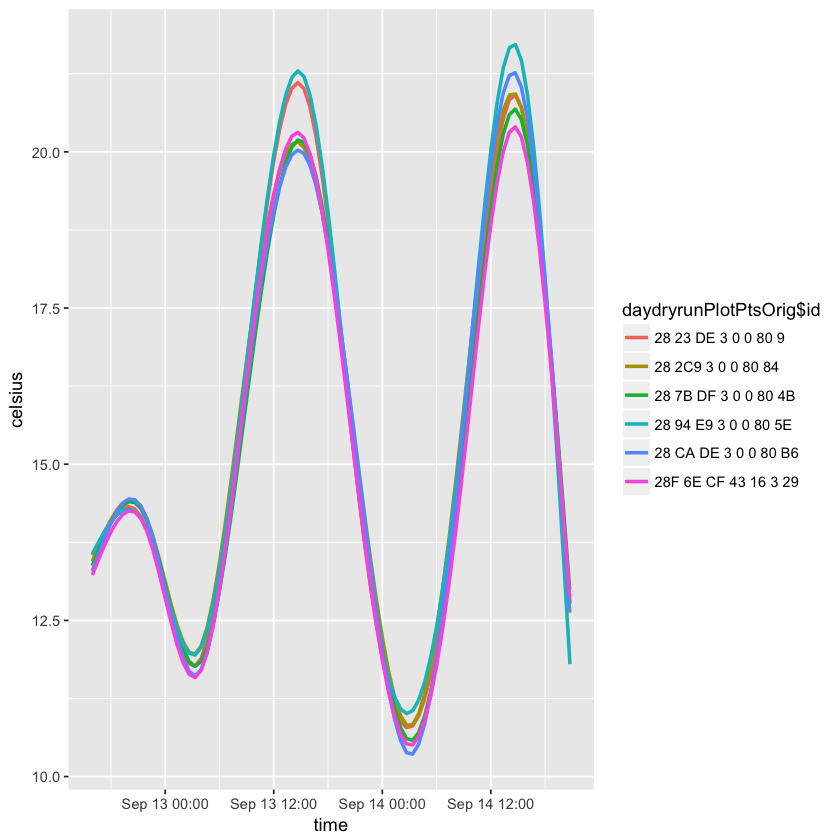

In [3]:
# Get the metadata of the plots (comparision)
myurl <- "https://raw.githubusercontent.com/ajijohn/geiger/master/data/2daydryrun.csv"
download.file(url=myurl, destfile="./data/daydryrun.csv", method="wget")
daydryrunPlotPtsOrig<- read.csv('./data/daydryrun.csv')
str(daydryrunPlotPtsOrig)

daydryrunPlotPtsOrig$time <-as.POSIXct(strptime(daydryrunPlotPtsOrig$time, "%Y/%m/%d %H:%M:%S"))
str(daydryrunPlotPtsOrig)
ggplot(daydryrunPlotPtsOrig, aes(time,celsius, color = daydryrunPlotPtsOrig$id)) + stat_smooth(se = FALSE)

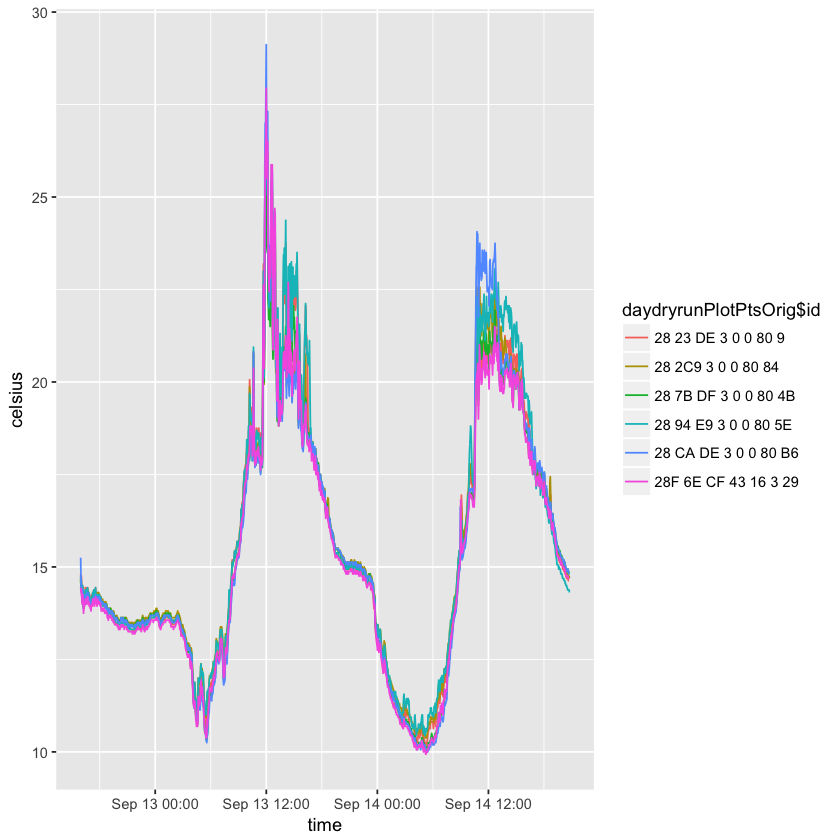

In [4]:
ggplot(daydryrunPlotPtsOrig, aes(time,celsius, color = daydryrunPlotPtsOrig$id)) + geom_line()

In [5]:
# Get the metadata of the plots (comparision)
#myurl <- "https://raw.githubusercontent.com/ajijohn/geiger/master/data/2-day-dryrun.txt"
#download.file(url=myurl, destfile="./data/daydryrun.csv", method="wget")
daydryrunPlotPts<- read.csv('./data/2-day.csv')
str(daydryrunPlotPts)
#format the date
daydryrunPlotPts$time <-as.POSIXct(strptime(daydryrunPlotPts$time, "%m/%d/%y %H:%M"))
str(daydryrunPlotPts)

'data.frame':	8282 obs. of  4 variables:
 $ time   : Factor w/ 1734 levels "9/12/16 15:56",..: 1 1 1 1 1 1 2 2 2 2 ...
 $ id     : Factor w/ 6 levels "28 23 DE 3 0 0 80 9",..: 4 2 5 1 3 6 4 2 5 1 ...
 $ celsius: num  14.8 14.7 15.2 14.8 14.6 ...
 $ farenh : num  58.5 58.4 59.5 58.7 58.3 ...
'data.frame':	8282 obs. of  4 variables:
 $ time   : POSIXct, format: "2016-09-12 15:56:00" "2016-09-12 15:56:00" ...
 $ id     : Factor w/ 6 levels "28 23 DE 3 0 0 80 9",..: 4 2 5 1 3 6 4 2 5 1 ...
 $ celsius: num  14.8 14.7 15.2 14.8 14.6 ...
 $ farenh : num  58.5 58.4 59.5 58.7 58.3 ...


Lets look at iButton Data collected in front of Bechtel house 

In [6]:
#format the date
ArrayPlotPts$time <-as.POSIXct(ArrayPlotPts$time, "%Y/%m/%d %H:%M:%S")
str(ArrayPlotPts)

Warning message in strptime(xx, f <- "%Y-%m-%d %H:%M:%OS", tz = tz):
“unknown timezone '%Y/%m/%d %H:%M:%S'”Warning message in as.POSIXct.POSIXlt(x):
“unknown timezone '%Y/%m/%d %H:%M:%S'”Warning message in strptime(xx, f <- "%Y/%m/%d %H:%M:%OS", tz = tz):
“unknown timezone '%Y/%m/%d %H:%M:%S'”Warning message in as.POSIXct.POSIXlt(x):
“unknown timezone '%Y/%m/%d %H:%M:%S'”Warning message in strptime(x, f, tz = tz):
“unknown timezone '%Y/%m/%d %H:%M:%S'”Warning message in as.POSIXct.POSIXlt(as.POSIXlt(x, tz, ...), tz, ...):
“unknown timezone '%Y/%m/%d %H:%M:%S'”

'data.frame':	85 obs. of  4 variables:
 $ time   : POSIXct, format: 

Warning message in as.POSIXlt.POSIXct(x, tz):
“unknown timezone '%Y/%m/%d %H:%M:%S'”

"2016-09-08 16:12:31" "2016-09-08 16:12:34" ...
 $ id     : Factor w/ 5 levels "28 23 DE 3 0 0 80 9",..: 4 2 5 1 3 4 2 5 1 3 ...
 $ celsius: num  27.4 23.8 24.9 25.1 25.2 ...
 $ farenh : num  81.3 74.8 76.9 77.2 77.5 ...


In [7]:
levels(ArrayPlotPts$id) <- c('Exposed 1','Inhouse Shield','Exposed 2','Exposed 3','Commercial Shield')

#Lets look as an ancillary data about shields

Warning message in as.POSIXlt.POSIXct(x):
“unknown timezone '%Y/%m/%d %H:%M:%S'”Warning message in as.POSIXct.POSIXlt(from):
“unknown timezone '%Y/%m/%d %H:%M:%S'”Warning message in as.POSIXct.POSIXlt(from):
“unknown timezone '%Y/%m/%d %H:%M:%S'”Warning message in as.POSIXlt.POSIXct(x, tz):
“unknown timezone '%Y/%m/%d %H:%M:%S'”

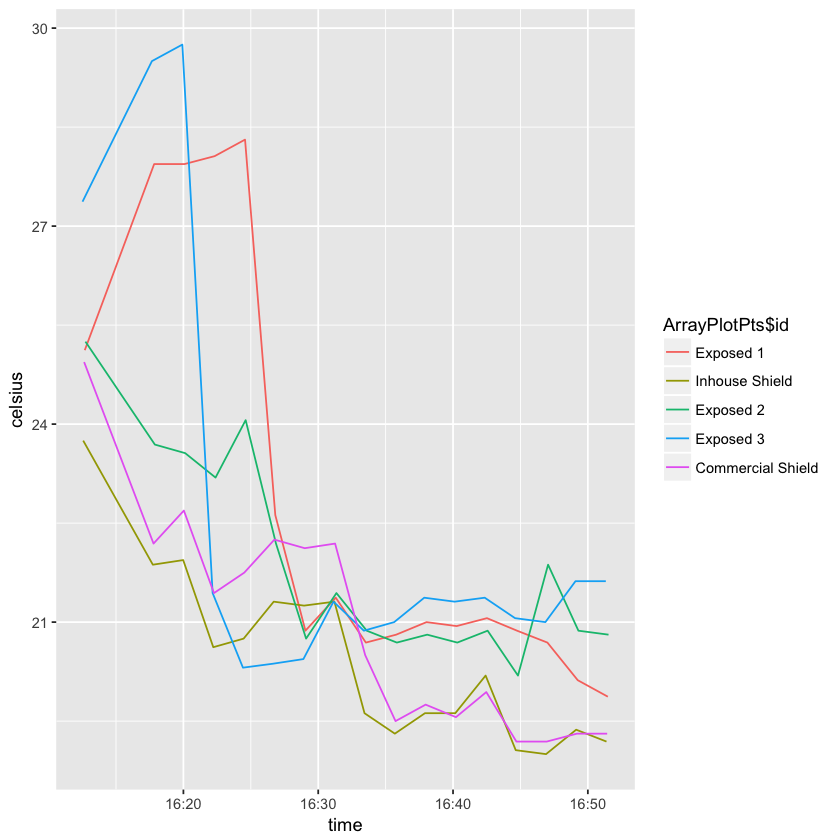

In [8]:
ggplot(ArrayPlotPts, aes(time,celsius, color = ArrayPlotPts$id)) + geom_line()

In [9]:
# iButton at three different heights
Bechtelibut<- read.csv('./data/Bechtelibut.csv')
str(Bechtelibut)

#daydryrunPlotPtsOrig$time <-as.POSIXct(strptime(daydryrunPlotPtsOrig$time, "%Y/%m/%d %H:%M:%S"))
#str(daydryrunPlotPtsOrig)
#ggplot(daydryrunPlotPtsOrig, aes(time,celsius, color = daydryrunPlotPtsOrig$id)) + stat_smooth(se = FALSE)

'data.frame':	6144 obs. of  4 variables:
 $ Time         : Factor w/ 4096 levels "2016-07-21 18:21:00",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ TempC        : num  26 23.5 23 23 23 23 23 23 23 23 ...
 $ Serial.number: Factor w/ 3 levels "6900000038A32F21",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ ID           : Factor w/ 3 levels "height-1","height-2",..: 3 3 3 3 3 3 3 3 3 3 ...


In [10]:
Bechtelibut$Time <- as.POSIXct(Bechtelibut$Time, "%Y-%m-%d %H:%M:%S")

Warning message in strptime(xx, f <- "%Y-%m-%d %H:%M:%OS", tz = tz):
“unknown timezone '%Y-%m-%d %H:%M:%S'”Warning message in as.POSIXct.POSIXlt(x):
“unknown timezone '%Y-%m-%d %H:%M:%S'”Warning message in strptime(x, f, tz = tz):
“unknown timezone '%Y-%m-%d %H:%M:%S'”Warning message in as.POSIXct.POSIXlt(as.POSIXlt(x, tz, ...), tz, ...):
“unknown timezone '%Y-%m-%d %H:%M:%S'”

In [11]:
#str(Bechtelibut)

Bechtelibut$time <-as.POSIXct(strptime(Bechtelibut$Time, "%Y-%m-%d %H:%M:%S"))

Warning message in as.POSIXlt.POSIXct(x, tz):
“unknown timezone '%Y-%m-%d %H:%M:%S'”

`geom_smooth()` using method = 'gam'


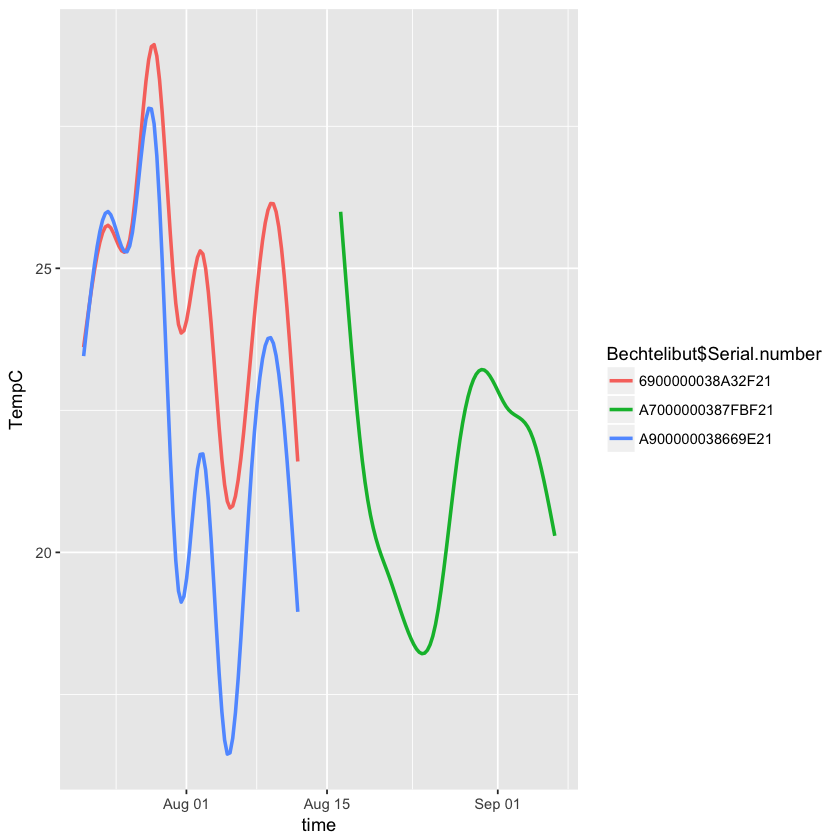

In [12]:
ggplot(Bechtelibut, aes(time,TempC, color = Bechtelibut$Serial.number)) + stat_smooth(se = FALSE)

Lets see in detail

Tmax nd Tmin

6am and 2pm

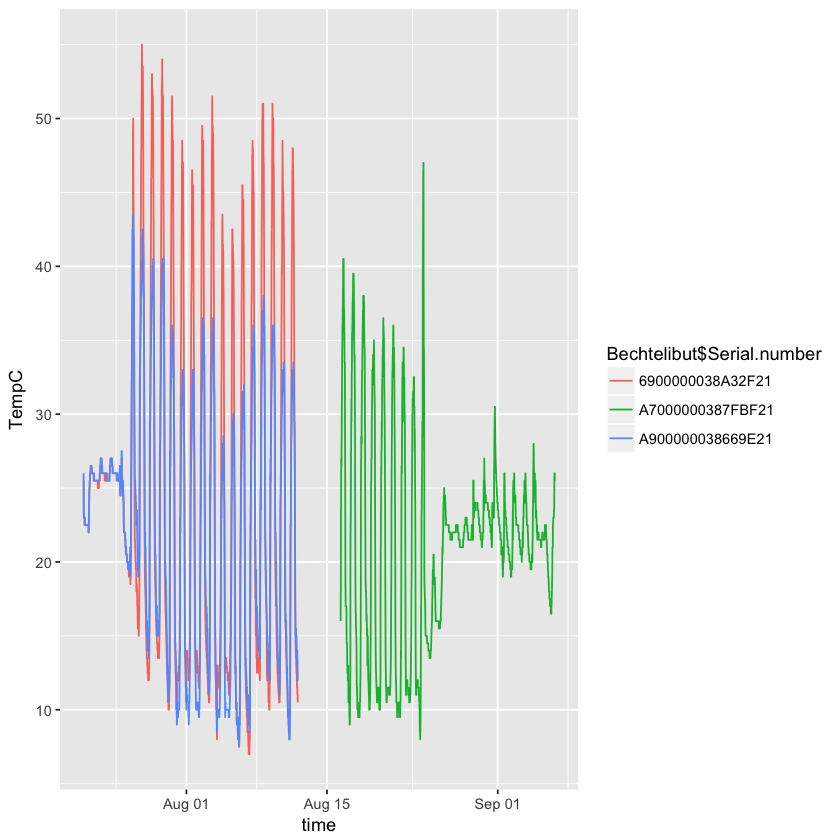

In [13]:
ggplot(Bechtelibut, aes(time,TempC, color = Bechtelibut$Serial.number)) + geom_line()

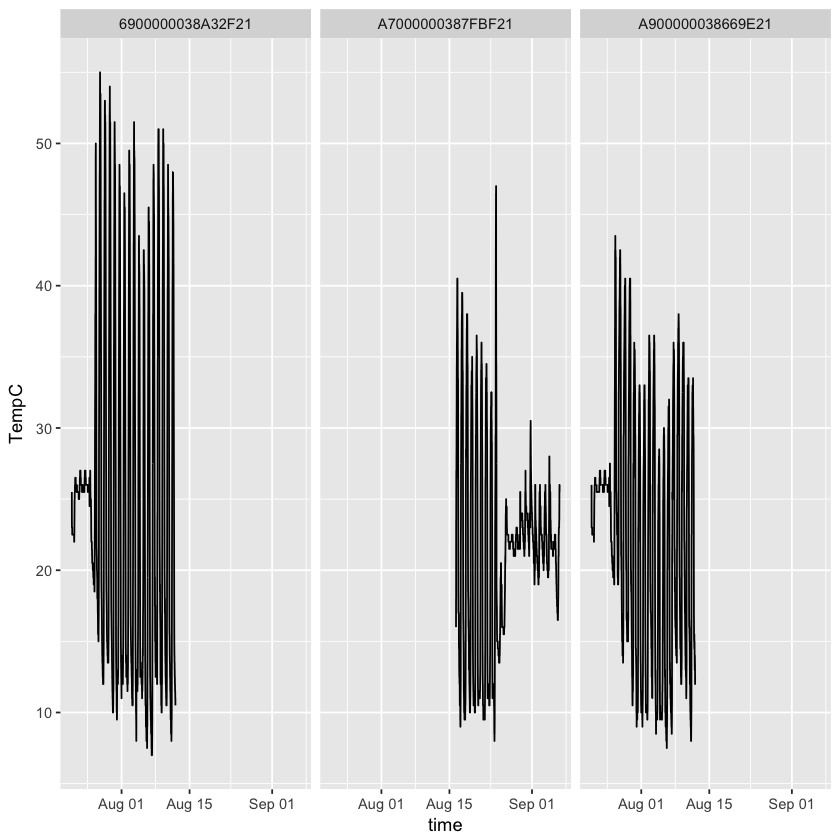

In [14]:
p <- ggplot(data = Bechtelibut, aes(x = time, y = TempC)) + geom_line()
p + facet_wrap(~Serial.number)

'data.frame':	15172 obs. of  4 variables:
 $ time   : Factor w/ 15172 levels "2016/9/15 15:12:34",..: 73 92 95 96 93 94 97 98 99 100 ...
 $ id     : Factor w/ 6 levels "28 23 DE 3 0 0 80 9",..: 4 2 5 1 3 6 4 2 5 1 ...
 $ celsius: num  27.9 27.2 27.1 27.2 27.4 ...
 $ farenh : num  82.2 81 80.7 80.9 81.4 ...
'data.frame':	15172 obs. of  4 variables:
 $ time   : POSIXct, format: "2016-09-15 15:05:58" "2016-09-15 15:06:01" ...
 $ id     : Factor w/ 6 levels "28 23 DE 3 0 0 80 9",..: 4 2 5 1 3 6 4 2 5 1 ...
 $ celsius: num  27.9 27.2 27.1 27.2 27.4 ...
 $ farenh : num  82.2 81 80.7 80.9 81.4 ...


`geom_smooth()` using method = 'gam'


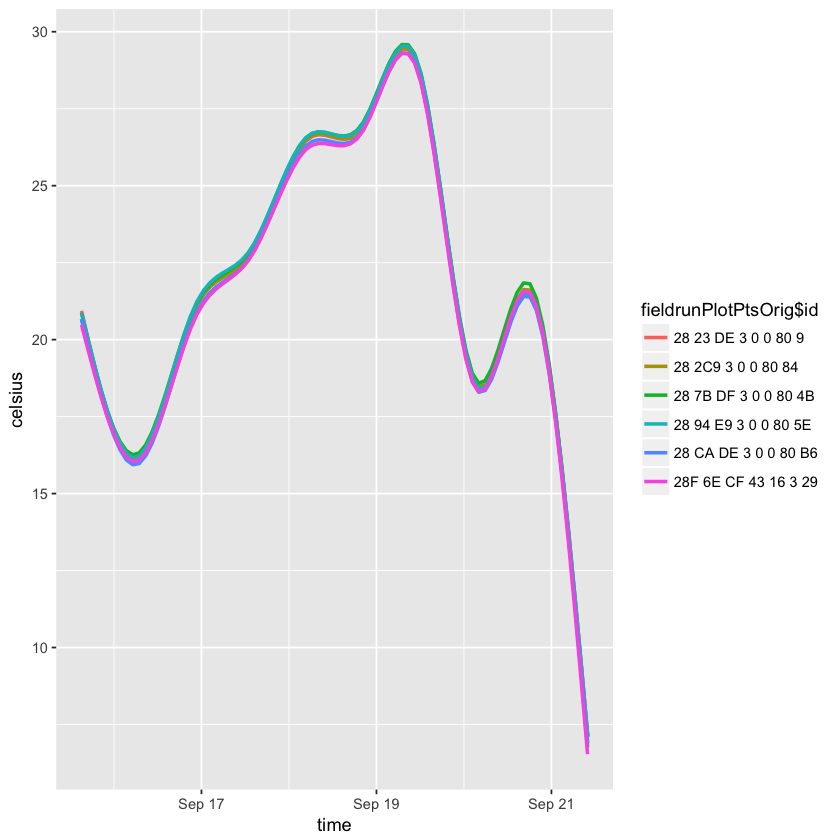

In [15]:
#pepperwood field run

fieldrunPlotPtsOrig<- read.csv('./data/field-run.csv')
str(fieldrunPlotPtsOrig)

fieldrunPlotPtsOrig$time <-as.POSIXct(strptime(fieldrunPlotPtsOrig$time, "%Y/%m/%d %H:%M:%S"))
str(fieldrunPlotPtsOrig)
ggplot(fieldrunPlotPtsOrig, aes(time,celsius, color = fieldrunPlotPtsOrig$id)) + stat_smooth(se = FALSE)

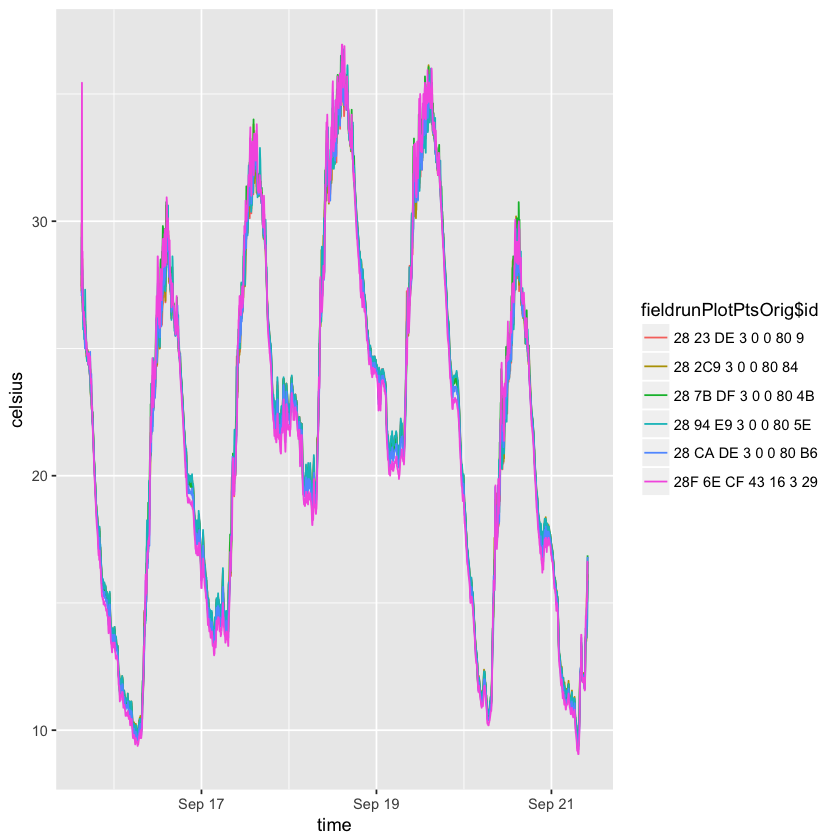

In [16]:
ggplot(fieldrunPlotPtsOrig, aes(time,celsius, color = fieldrunPlotPtsOrig$id)) + geom_line()

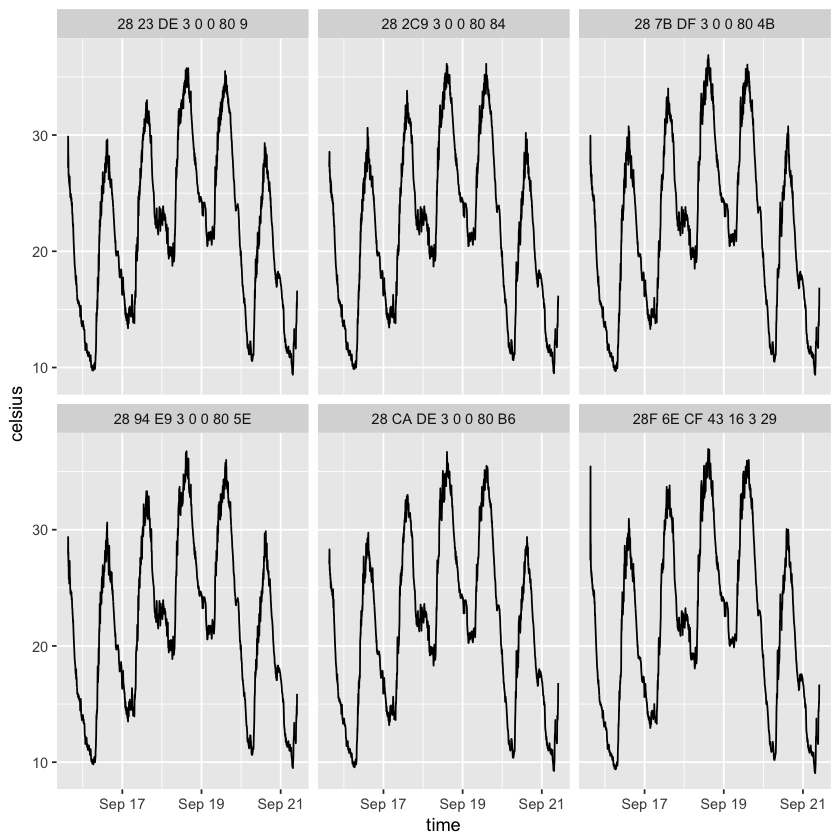

In [17]:
p <- ggplot(data = fieldrunPlotPtsOrig, aes(x = time, y = celsius)) + geom_line()
p + facet_wrap(~id)

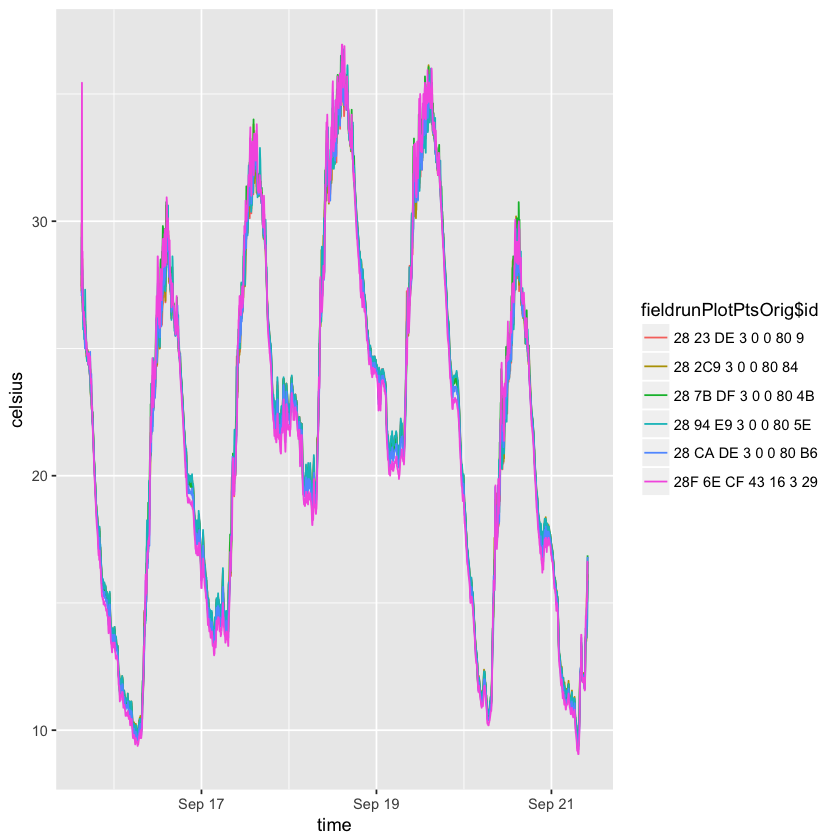

In [18]:
library(scales)
ggplot(fieldrunPlotPtsOrig, aes(time,celsius, color = fieldrunPlotPtsOrig$id)) + geom_line()

In [19]:
str(fieldrunPlotPtsOrig)

'data.frame':	15172 obs. of  4 variables:
 $ time   : POSIXct, format: "2016-09-15 15:05:58" "2016-09-15 15:06:01" ...
 $ id     : Factor w/ 6 levels "28 23 DE 3 0 0 80 9",..: 4 2 5 1 3 6 4 2 5 1 ...
 $ celsius: num  27.9 27.2 27.1 27.2 27.4 ...
 $ farenh : num  82.2 81 80.7 80.9 81.4 ...



Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



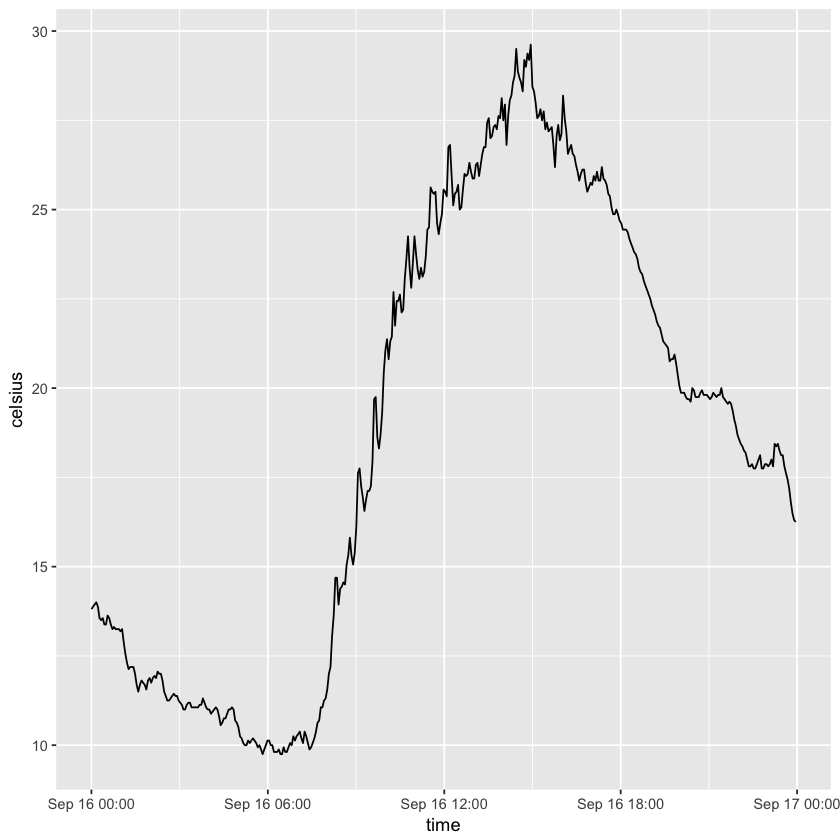

In [20]:
library("lubridate")
fieldrunPlotPtsOrig %>% filter(day(time) %in% '16',id %in% "28 23 DE 3 0 0 80 9") %>%
ggplot( aes(time,celsius)) + geom_line()

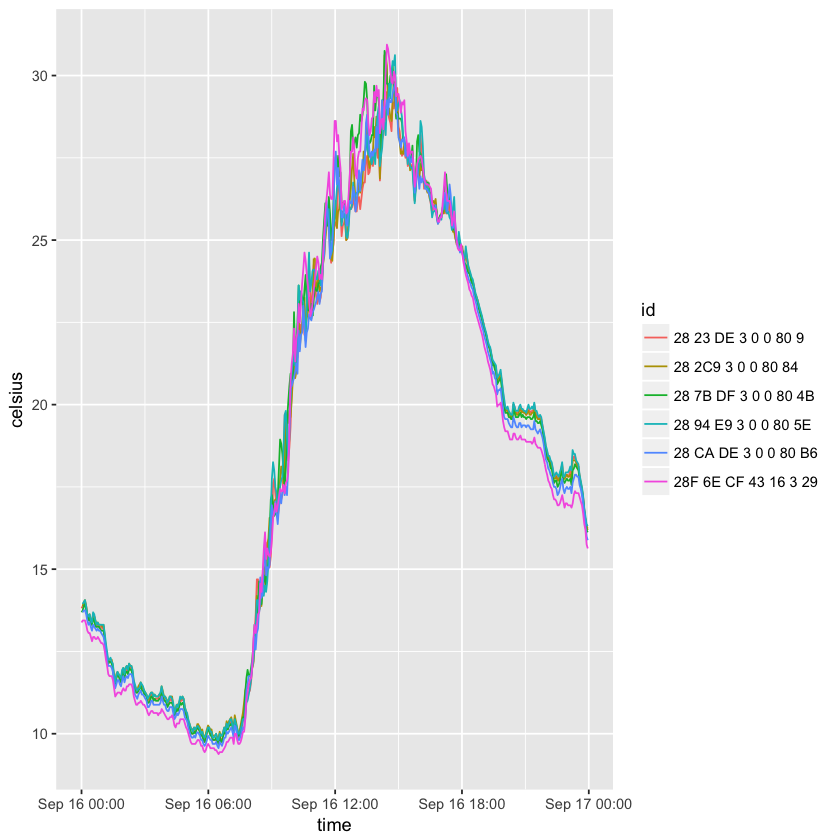

In [21]:
fieldrunPlotPtsOrig %>% filter(day(time) %in% '16') %>%
ggplot( aes(time,celsius,color = id)) + geom_line()

In [22]:
#total height is 1.8 meters
# Few observations
# During morning time midnight to 6am - its defnitely by height - lower the sensor lower the temp
# And also the same from 6 pm to midnight

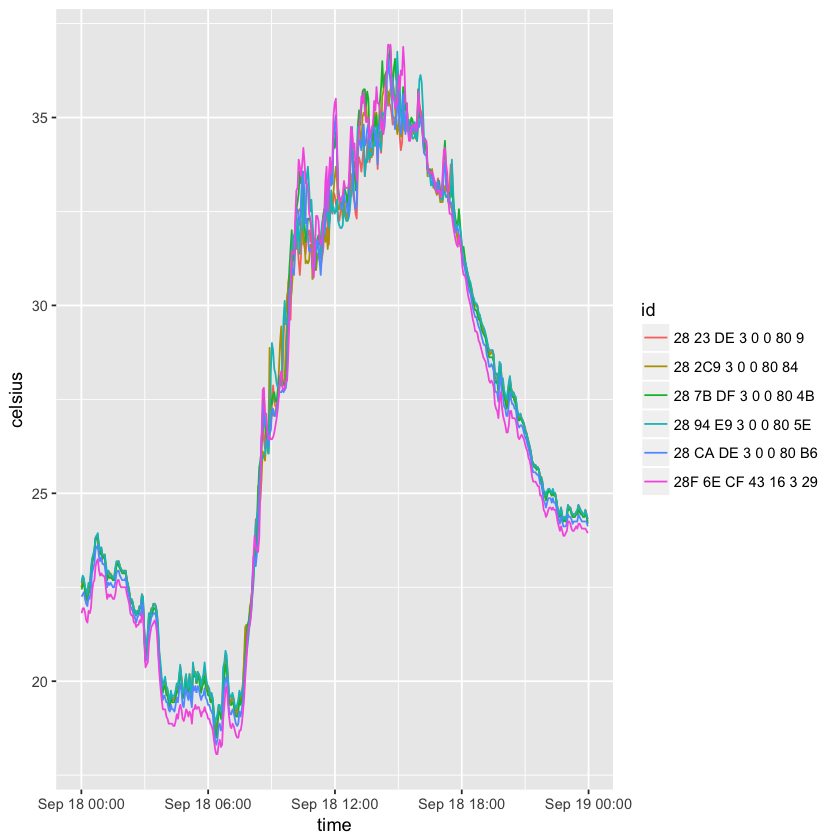

In [23]:
fieldrunPlotPtsOrig %>% filter(day(time) %in% c('18')) %>%
ggplot( aes(time,celsius,color = id)) + geom_line()

In [24]:
fieldrunPlotPtsOrig %>% mutate(hr=hour(time),day=day(time),year=year(time),month=month(time)) %>% 
group_by(id,month,day,hr) %>% summarize(mhrly=mean(celsius))

id                   month day hr mhrly    
1   28 23 DE 3 0 0 80 9  9     15  15 26.847647
2   28 23 DE 3 0 0 80 9  9     15  16 25.078889
3   28 23 DE 3 0 0 80 9  9     15  17 23.728889
4   28 23 DE 3 0 0 80 9  9     15  18 20.967222
5   28 23 DE 3 0 0 80 9  9     15  19 18.166316
6   28 23 DE 3 0 0 80 9  9     15  20 16.492222
7   28 23 DE 3 0 0 80 9  9     15  21 15.545556
8   28 23 DE 3 0 0 80 9  9     15  22 14.956667
9   28 23 DE 3 0 0 80 9  9     15  23 13.862778
10  28 23 DE 3 0 0 80 9  9     16   0 13.524211
11  28 23 DE 3 0 0 80 9  9     16   1 12.060000
12  28 23 DE 3 0 0 80 9  9     16   2 11.602222
13  28 23 DE 3 0 0 80 9  9     16   3 11.108333
14  28 23 DE 3 0 0 80 9  9     16   4 10.849474
15  28 23 DE 3 0 0 80 9  9     16   5 10.043333
16  28 23 DE 3 0 0 80 9  9     16   6  9.951667
17  28 23 DE 3 0 0 80 9  9     16   7 10.448889
18  28 23 DE 3 0 0 80 9  9     16   8 14.198333
19  28 23 DE 3 0 0 80 9  9     16   9 18.126842
20  28 23 DE 3 0 0 80 9  9     16  10 22.557778
21  28 23 DE 3 0 0 80 9  9     16  11 24.362778
22  28 23 DE 3 0 0 80 9  9     16  12 25.773333
23  28 23 DE 3 0 0 80 9  9     16  13 26.942778
24  28 23 DE 3 0 0 80 9  9     16  14 28.535263
25  28 23 DE 3 0 0 80 9  9     16  15 27.360000
26  28 23 DE 3 0 0 80 9  9     16  16 26.391111
27  28 23 DE 3 0 0 80 9  9     16  17 25.491667
28  28 23 DE 3 0 0 80 9  9     16  18 23.707222
29  28 23 DE 3 0 0 80 9  9     16  19 21.324737
30  28 23 DE 3 0 0 80 9  9     16  20 19.807778
⋮   ⋮                    ⋮     ⋮   ⋮  ⋮        
805 28F 6E CF 43 16 3 29 9     20   4 11.27222 
806 28F 6E CF 43 16 3 29 9     20   5 11.36944 
807 28F 6E CF 43 16 3 29 9     20   6 10.50053 
808 28F 6E CF 43 16 3 29 9     20   7 11.65056 
809 28F 6E CF 43 16 3 29 9     20   8 16.99167 
810 28F 6E CF 43 16 3 29 9     20   9 18.84222 
811 28F 6E CF 43 16 3 29 9     20  10 23.04833 
812 28F 6E CF 43 16 3 29 9     20  11 23.84105 
813 28F 6E CF 43 16 3 29 9     20  12 25.34278 
814 28F 6E CF 43 16 3 29 9     20  13 27.45111 
815 28F 6E CF 43 16 3 29 9     20  14 28.77722 
816 28F 6E CF 43 16 3 29 9     20  15 28.30444 
817 28F 6E CF 43 16 3 29 9     20  16 26.48526 
818 28F 6E CF 43 16 3 29 9     20  17 25.06389 
819 28F 6E CF 43 16 3 29 9     20  18 22.33889 
820 28F 6E CF 43 16 3 29 9     20  19 19.95389 
821 28F 6E CF 43 16 3 29 9     20  20 17.76278 
822 28F 6E CF 43 16 3 29 9     20  21 16.69368 
823 28F 6E CF 43 16 3 29 9     20  22 17.32278 
824 28F 6E CF 43 16 3 29 9     20  23 17.27667 
825 28F 6E CF 43 16 3 29 9     21   0 16.18278 
826 28F 6E CF 43 16 3 29 9     21   1 14.75167 
827 28F 6E CF 43 16 3 29 9     21   2 12.18421 
828 28F 6E CF 43 16 3 29 9     21   3 11.13611 
829 28F 6E CF 43 16 3 29 9     21   4 11.11889 
830 28F 6E CF 43 16 3 29 9     21   5 10.72389 
831 28F 6E CF 43 16 3 29 9     21   6 10.26500 
832 28F 6E CF 43 16 3 29 9     21   7 10.02421 
833 28F 6E CF 43 16 3 29 9     21   8 12.35444 
834 28F 6E CF 43 16 3 29 9     21   9 13.98588

In [25]:
fieldrunPlotPtsOrig %>% mutate(hr=hour(time),day=day(time),year=year(time),month=month(time),date=date(time))

time                id                   celsius farenh hr day year month
1     2016-09-15 15:05:58 28 94 E9 3 0 0 80 5E 27.87   82.18  15 15  2016 9    
2     2016-09-15 15:06:01 28 2C9 3 0 0 80 84   27.25   81.05  15 15  2016 9    
3     2016-09-15 15:06:05 28 CA DE 3 0 0 80 B6 27.06   80.71  15 15  2016 9    
4     2016-09-15 15:06:08 28 23 DE 3 0 0 80 9  27.19   80.94  15 15  2016 9    
5     2016-09-15 15:06:11 28 7B DF 3 0 0 80 4B 27.44   81.39  15 15  2016 9    
6     2016-09-15 15:06:14 28F 6E CF 43 16 3 29 27.37   81.27  15 15  2016 9    
7     2016-09-15 15:09:17 28 94 E9 3 0 0 80 5E 29.37   84.87  15 15  2016 9    
8     2016-09-15 15:09:20 28 2C9 3 0 0 80 84   27.75   81.95  15 15  2016 9    
9     2016-09-15 15:09:23 28 CA DE 3 0 0 80 B6 27.31   81.16  15 15  2016 9    
10    2016-09-15 15:09:26 28 23 DE 3 0 0 80 9  29.87   85.77  15 15  2016 9    
11    2016-09-15 15:09:29 28 7B DF 3 0 0 80 4B 29.94   85.89  15 15  2016 9    
12    2016-09-15 15:09:32 28F 6E CF 43 16 3 29 32.25   90.05  15 15  2016 9    
13    2016-09-15 15:12:34 28 94 E9 3 0 0 80 5E 28.69   83.64  15 15  2016 9    
14    2016-09-15 15:12:38 28 2C9 3 0 0 80 84   28.19   82.74  15 15  2016 9    
15    2016-09-15 15:12:41 28 CA DE 3 0 0 80 B6 27.69   81.84  15 15  2016 9    
16    2016-09-15 15:12:44 28 23 DE 3 0 0 80 9  29.19   84.54  15 15  2016 9    
17    2016-09-15 15:12:47 28 7B DF 3 0 0 80 4B 29.06   84.31  15 15  2016 9    
18    2016-09-15 15:12:50 28F 6E CF 43 16 3 29 35.44   95.79  15 15  2016 9    
19    2016-09-15 15:15:52 28 94 E9 3 0 0 80 5E 27.37   81.27  15 15  2016 9    
20    2016-09-15 15:15:55 28 2C9 3 0 0 80 84   28.56   83.41  15 15  2016 9    
21    2016-09-15 15:15:58 28 CA DE 3 0 0 80 B6 28.31   82.96  15 15  2016 9    
22    2016-09-15 15:16:02 28 23 DE 3 0 0 80 9  28.00   82.40  15 15  2016 9    
23    2016-09-15 15:16:05 28 7B DF 3 0 0 80 4B 27.50   81.50  15 15  2016 9    
24    2016-09-15 15:16:08 28F 6E CF 43 16 3 29 29.69   85.44  15 15  2016 9    
25    2016-09-15 15:19:10 28 94 E9 3 0 0 80 5E 28.06   82.51  15 15  2016 9    
26    2016-09-15 15:19:13 28 2C9 3 0 0 80 84   28.50   83.30  15 15  2016 9    
27    2016-09-15 15:19:16 28 CA DE 3 0 0 80 B6 28.19   82.74  15 15  2016 9    
28    2016-09-15 15:19:19 28 23 DE 3 0 0 80 9  28.12   82.62  15 15  2016 9    
29    2016-09-15 15:19:22 28 7B DF 3 0 0 80 4B 27.75   81.95  15 15  2016 9    
30    2016-09-15 15:19:26 28F 6E CF 43 16 3 29 27.31   81.16  15 15  2016 9    
⋮     ⋮                   ⋮                    ⋮       ⋮      ⋮  ⋮   ⋮    ⋮    
15143 2016-09-21 09:41:47 28 7B DF 3 0 0 80 4B 14.38   57.88  9  21  2016 9    
15144 2016-09-21 09:41:50 28F 6E CF 43 16 3 29 15.19   59.34  9  21  2016 9    
15145 2016-09-21 09:44:52 28 94 E9 3 0 0 80 5E 14.75   58.55  9  21  2016 9    
15146 2016-09-21 09:44:55 28 2C9 3 0 0 80 84   15.75   60.35  9  21  2016 9    
15147 2016-09-21 09:44:58 28 CA DE 3 0 0 80 B6 14.75   58.55  9  21  2016 9    
15148 2016-09-21 09:45:01 28 23 DE 3 0 0 80 9  15.63   60.13  9  21  2016 9    
15149 2016-09-21 09:45:04 28 7B DF 3 0 0 80 4B 15.25   59.45  9  21  2016 9    
15150 2016-09-21 09:45:07 28F 6E CF 43 16 3 29 15.06   59.11  9  21  2016 9    
15151 2016-09-21 09:48:10 28 94 E9 3 0 0 80 5E 14.06   57.31  9  21  2016 9    
15152 2016-09-21 09:48:13 28 2C9 3 0 0 80 84   15.19   59.34  9  21  2016 9    
15153 2016-09-21 09:48:16 28 CA DE 3 0 0 80 B6 14.81   58.66  9  21  2016 9    
15154 2016-09-21 09:48:19 28 23 DE 3 0 0 80 9  15.06   59.11  9  21  2016 9    
15155 2016-09-21 09:48:22 28 7B DF 3 0 0 80 4B 15.00   59.00  9  21  2016 9    
15156 2016-09-21 09:48:25 28F 6E CF 43 16 3 29 15.50   59.90  9  21  2016 9    
15157 2016-09-21 09:51:27 28 94 E9 3 0 0 80 5E 14.50   58.10  9  21  2016 9    
15158 2016-09-21 09:51:30 28 2C9 3 0 0 80 84   15.69   60.24  9  21  2016 9    
15159 2016-09-21 09:51:34 28 CA DE 3 0 0 80 B6 15.69   60.24  9  21  2016 9    
15160 2016-09-21 09:51:37 28 23 DE 3 0 0 80 9  15.19   59.34  9  21  2016 9    
15161 

In [26]:
fieldrunPlotPtsOrig %>% mutate(hr=hour(time),day=day(time),year=year(time),month=month(time),date=date(time)) %>%
group_by(date) %>% summarize(avgtemp = mean(celsius))

date       avgtemp 
1 2016-09-15 19.37850
2 2016-09-16 18.77222
3 2016-09-17 22.38310
4 2016-09-18 27.09519
5 2016-09-19 26.63899
6 2016-09-20 19.23283
7 2016-09-21 12.48097

In [27]:
fieldrunPlotPtsOrig %>% mutate(hr=hour(time),day=day(time),year=year(time),month=month(time),date=date(time)) %>%
group_by(date,hr) %>% summarize(avgtemp = mean(celsius)) %>% nrow()

[1] 139

So, we do take the average by day, hr. We next do the difference

In [28]:
fieldrunPlotPtsOrig %>% mutate(hr=hour(time),day=day(time),year=year(time),month=month(time),date=date(time)) %>%
group_by(id,date,hr) %>% summarize(avgtemp = mean(celsius)) %>% nrow()

[1] 834

In [29]:
#create average by day
fieldrunbyday = fieldrunPlotPtsOrig %>% 
mutate(hr=hour(time),day=day(time),year=year(time),month=month(time),date=date(time)) %>%
group_by(date,hr) %>% summarize(avgtemp = mean(celsius)) %>% as.data.frame()

In [30]:
str(fieldrunbyday)

'data.frame':	139 obs. of  3 variables:
 $ date   : Date, format: "2016-09-15" "2016-09-15" ...
 $ hr     : int  15 16 17 18 19 20 21 22 23 0 ...
 $ avgtemp: num  26.9 25.1 23.8 20.9 18 ...


In [31]:
fieldrunPlotPtsOrig %>% mutate(hr=hour(time),day=day(time),year=year(time),month=month(time),date=date(time)) %>%
group_by(id,date,hr) %>% summarize(avgtemp = mean(celsius))

id                   date       hr avgtemp  
1   28 23 DE 3 0 0 80 9  2016-09-15 15 26.847647
2   28 23 DE 3 0 0 80 9  2016-09-15 16 25.078889
3   28 23 DE 3 0 0 80 9  2016-09-15 17 23.728889
4   28 23 DE 3 0 0 80 9  2016-09-15 18 20.967222
5   28 23 DE 3 0 0 80 9  2016-09-15 19 18.166316
6   28 23 DE 3 0 0 80 9  2016-09-15 20 16.492222
7   28 23 DE 3 0 0 80 9  2016-09-15 21 15.545556
8   28 23 DE 3 0 0 80 9  2016-09-15 22 14.956667
9   28 23 DE 3 0 0 80 9  2016-09-15 23 13.862778
10  28 23 DE 3 0 0 80 9  2016-09-16  0 13.524211
11  28 23 DE 3 0 0 80 9  2016-09-16  1 12.060000
12  28 23 DE 3 0 0 80 9  2016-09-16  2 11.602222
13  28 23 DE 3 0 0 80 9  2016-09-16  3 11.108333
14  28 23 DE 3 0 0 80 9  2016-09-16  4 10.849474
15  28 23 DE 3 0 0 80 9  2016-09-16  5 10.043333
16  28 23 DE 3 0 0 80 9  2016-09-16  6  9.951667
17  28 23 DE 3 0 0 80 9  2016-09-16  7 10.448889
18  28 23 DE 3 0 0 80 9  2016-09-16  8 14.198333
19  28 23 DE 3 0 0 80 9  2016-09-16  9 18.126842
20  28 23 DE 3 0 0 80 9  2016-09-16 10 22.557778
21  28 23 DE 3 0 0 80 9  2016-09-16 11 24.362778
22  28 23 DE 3 0 0 80 9  2016-09-16 12 25.773333
23  28 23 DE 3 0 0 80 9  2016-09-16 13 26.942778
24  28 23 DE 3 0 0 80 9  2016-09-16 14 28.535263
25  28 23 DE 3 0 0 80 9  2016-09-16 15 27.360000
26  28 23 DE 3 0 0 80 9  2016-09-16 16 26.391111
27  28 23 DE 3 0 0 80 9  2016-09-16 17 25.491667
28  28 23 DE 3 0 0 80 9  2016-09-16 18 23.707222
29  28 23 DE 3 0 0 80 9  2016-09-16 19 21.324737
30  28 23 DE 3 0 0 80 9  2016-09-16 20 19.807778
⋮   ⋮                    ⋮          ⋮  ⋮        
805 28F 6E CF 43 16 3 29 2016-09-20  4 11.27222 
806 28F 6E CF 43 16 3 29 2016-09-20  5 11.36944 
807 28F 6E CF 43 16 3 29 2016-09-20  6 10.50053 
808 28F 6E CF 43 16 3 29 2016-09-20  7 11.65056 
809 28F 6E CF 43 16 3 29 2016-09-20  8 16.99167 
810 28F 6E CF 43 16 3 29 2016-09-20  9 18.84222 
811 28F 6E CF 43 16 3 29 2016-09-20 10 23.04833 
812 28F 6E CF 43 16 3 29 2016-09-20 11 23.84105 
813 28F 6E CF 43 16 3 29 2016-09-20 12 25.34278 
814 28F 6E CF 43 16 3 29 2016-09-20 13 27.45111 
815 28F 6E CF 43 16 3 29 2016-09-20 14 28.77722 
816 28F 6E CF 43 16 3 29 2016-09-20 15 28.30444 
817 28F 6E CF 43 16 3 29 2016-09-20 16 26.48526 
818 28F 6E CF 43 16 3 29 2016-09-20 17 25.06389 
819 28F 6E CF 43 16 3 29 2016-09-20 18 22.33889 
820 28F 6E CF 43 16 3 29 2016-09-20 19 19.95389 
821 28F 6E CF 43 16 3 29 2016-09-20 20 17.76278 
822 28F 6E CF 43 16 3 29 2016-09-20 21 16.69368 
823 28F 6E CF 43 16 3 29 2016-09-20 22 17.32278 
824 28F 6E CF 43 16 3 29 2016-09-20 23 17.27667 
825 28F 6E CF 43 16 3 29 2016-09-21  0 16.18278 
826 28F 6E CF 43 16 3 29 2016-09-21  1 14.75167 
827 28F 6E CF 43 16 3 29 2016-09-21  2 12.18421 
828 28F 6E CF 43 16 3 29 2016-09-21  3 11.13611 
829 28F 6E CF 43 16 3 29 2016-09-21  4 11.11889 
830 28F 6E CF 43 16 3 29 2016-09-21  5 10.72389 
831 28F 6E CF 43 16 3 29 2016-09-21  6 10.26500 
832 28F 6E CF 43 16 3 29 2016-09-21  7 10.02421 
833 28F 6E CF 43 16 3 29 2016-09-21  8 12.35444 
834 28F 6E CF 43 16 3 29 2016-09-21  9 13.98588

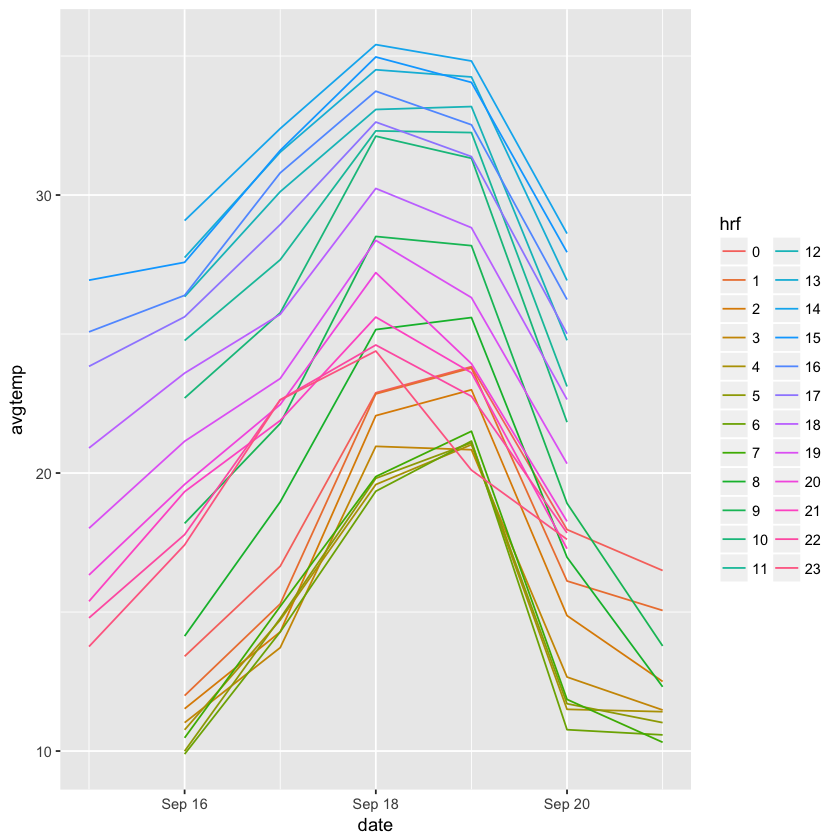

In [32]:
fieldrunbyday %>% mutate(hrf = factor(hr)) %>%
ggplot(aes(date,avgtemp, color=hrf)) + geom_line()

Comparison of temperatures by hour. Took mean temp by hour. Athough it is influenced by landscape features
and other climatic processes, we can posit that 

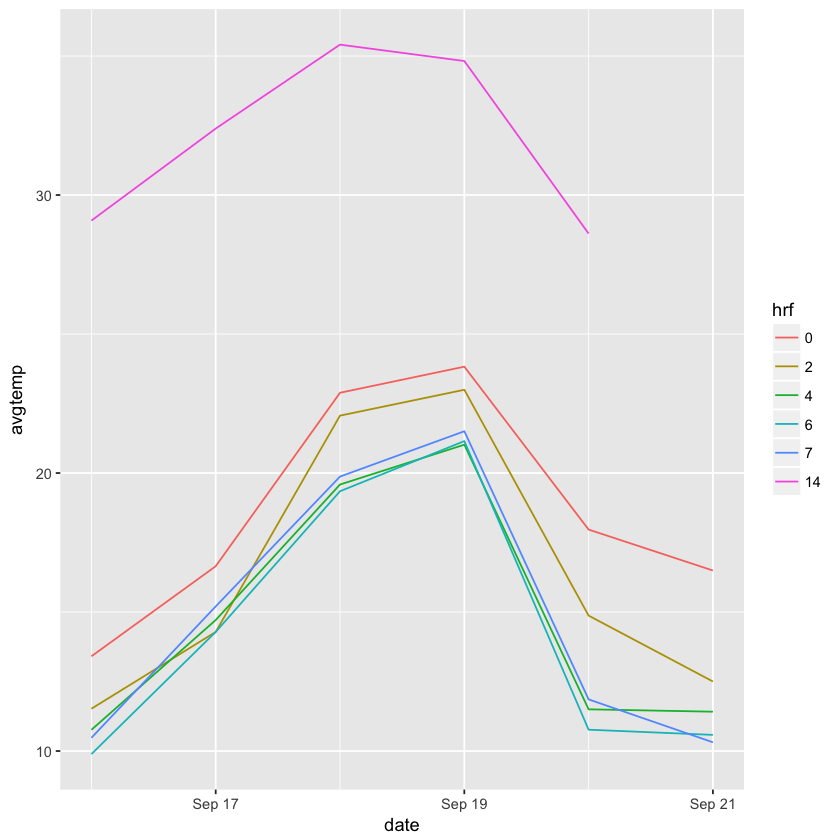

In [33]:
fieldrunbyday %>% mutate(hrf = factor(hr)) %>% filter(hr %in% c(0,2,4,6,7,14)) %>%
ggplot(aes(date,avgtemp, color=hrf)) + geom_line()

In [34]:
# Looks like 6am is the minimum temperature

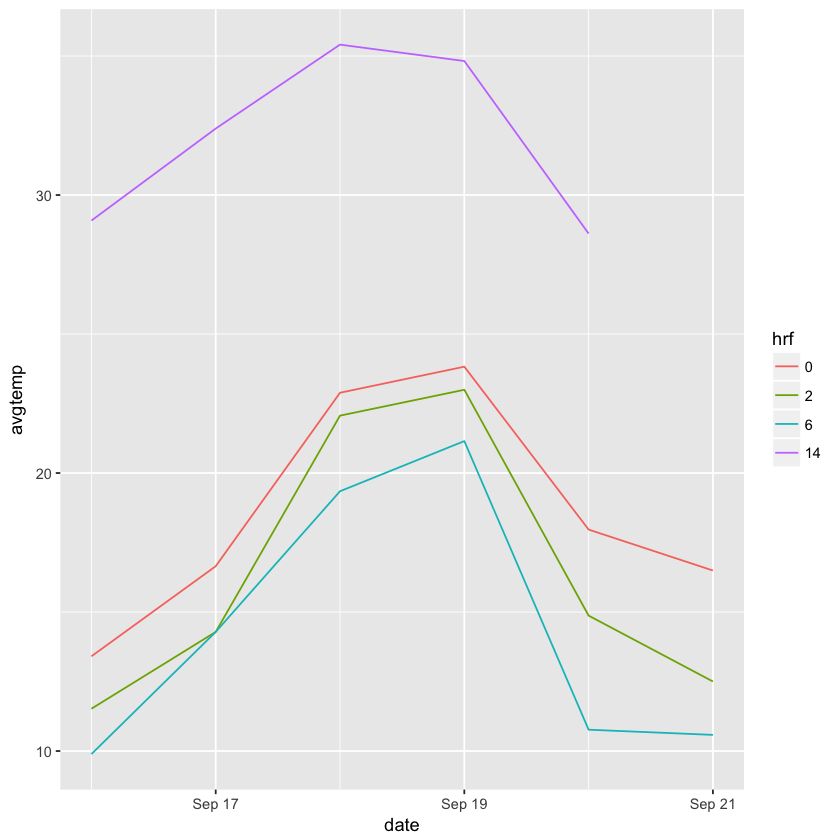

In [35]:
fieldrunbyday %>% mutate(hrf = factor(hr)) %>% filter(hr %in% c(0,2,6,14)) %>%
ggplot(aes(date,avgtemp, color=hrf)) + geom_line()

In [36]:
fieldrunPlotByIdHeight = fieldrunPlotPtsOrig %>% mutate(hr=hour(time),day=day(time),year=year(time),month=month(time),date=date(time)) %>%
as.data.frame()

In [37]:
str(fieldrunPlotByIdHeight)

'data.frame':	15172 obs. of  9 variables:
 $ time   : POSIXct, format: "2016-09-15 15:05:58" "2016-09-15 15:06:01" ...
 $ id     : Factor w/ 6 levels "28 23 DE 3 0 0 80 9",..: 4 2 5 1 3 6 4 2 5 1 ...
 $ celsius: num  27.9 27.2 27.1 27.2 27.4 ...
 $ farenh : num  82.2 81 80.7 80.9 81.4 ...
 $ hr     : int  15 15 15 15 15 15 15 15 15 15 ...
 $ day    : int  15 15 15 15 15 15 15 15 15 15 ...
 $ year   : num  2016 2016 2016 2016 2016 ...
 $ month  : num  9 9 9 9 9 9 9 9 9 9 ...
 $ date   : Date, format: "2016-09-15" "2016-09-15" ...


In [38]:
unique(fieldrunPlotByIdHeight$id)

[1] 28 94 E9 3 0 0 80 5E 28 2C9 3 0 0 80 84   28 CA DE 3 0 0 80 B6
[4] 28 23 DE 3 0 0 80 9  28 7B DF 3 0 0 80 4B 28F 6E CF 43 16 3 29
6 Levels: 28 23 DE 3 0 0 80 9 28 2C9 3 0 0 80 84 ... 28F 6E CF 43 16 3 29

In [39]:
fieldrunPlotByIdHeight$height <- 0

In [40]:
#set the heights

In [41]:
fieldrunPlotByIdHeight[fieldrunPlotByIdHeight$id=='28 94 E9 3 0 0 80 5E' ,]$height <- 6
fieldrunPlotByIdHeight[fieldrunPlotByIdHeight$id=='28 23 DE 3 0 0 80 9' ,]$height <- 5
fieldrunPlotByIdHeight[fieldrunPlotByIdHeight$id=='28 2C9 3 0 0 80 84' ,]$height <- 4
fieldrunPlotByIdHeight[fieldrunPlotByIdHeight$id=='28 7B DF 3 0 0 80 4B' ,]$height <- 3
fieldrunPlotByIdHeight[fieldrunPlotByIdHeight$id=='28 CA DE 3 0 0 80 B6' ,]$height <- 2
fieldrunPlotByIdHeight[fieldrunPlotByIdHeight$id=='28F 6E CF 43 16 3 29' ,]$height <-1

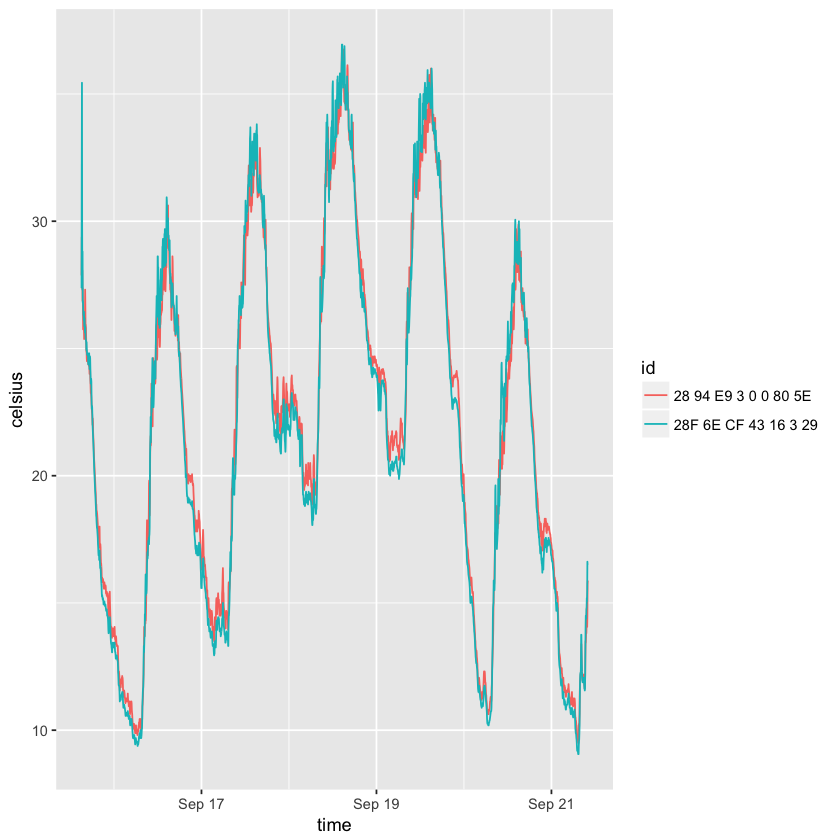

In [42]:
fieldrunPlotByIdHeight[fieldrunPlotByIdHeight$id=='28 94 E9 3 0 0 80 5E' | fieldrunPlotByIdHeight$id=='28F 6E CF 43 16 3 29' ,] %>%  
ggplot( aes(time,celsius,color = id)) + geom_line()

In [43]:
#lets see the variatio by height
str(fieldrunPlotByIdHeight)

'data.frame':	15172 obs. of  10 variables:
 $ time   : POSIXct, format: "2016-09-15 15:05:58" "2016-09-15 15:06:01" ...
 $ id     : Factor w/ 6 levels "28 23 DE 3 0 0 80 9",..: 4 2 5 1 3 6 4 2 5 1 ...
 $ celsius: num  27.9 27.2 27.1 27.2 27.4 ...
 $ farenh : num  82.2 81 80.7 80.9 81.4 ...
 $ hr     : int  15 15 15 15 15 15 15 15 15 15 ...
 $ day    : int  15 15 15 15 15 15 15 15 15 15 ...
 $ year   : num  2016 2016 2016 2016 2016 ...
 $ month  : num  9 9 9 9 9 9 9 9 9 9 ...
 $ date   : Date, format: "2016-09-15" "2016-09-15" ...
 $ height : num  6 4 2 5 3 1 6 4 2 5 ...


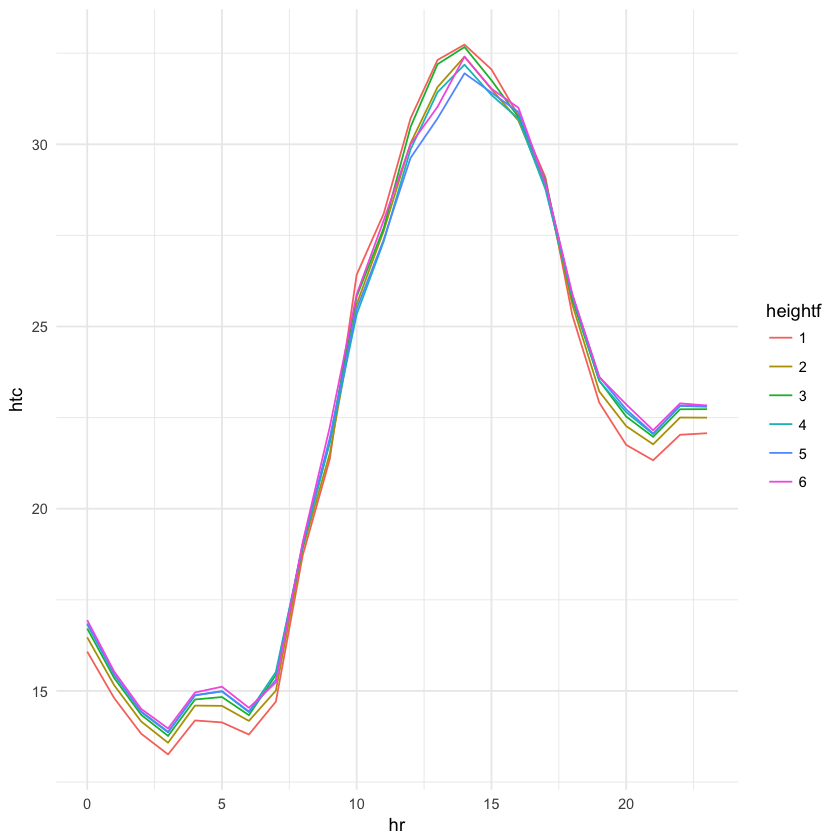

In [44]:
fieldrunPlotByIdHeight %>% group_by(date,hr, height) %>%
summarize(htc= mean(celsius)) %>% mutate(heightf= factor(height)) %>% 
filter(day(date) %in% c(17)) %>%
ggplot( aes(hr,htc,color = heightf)) + geom_line() + theme_minimal()

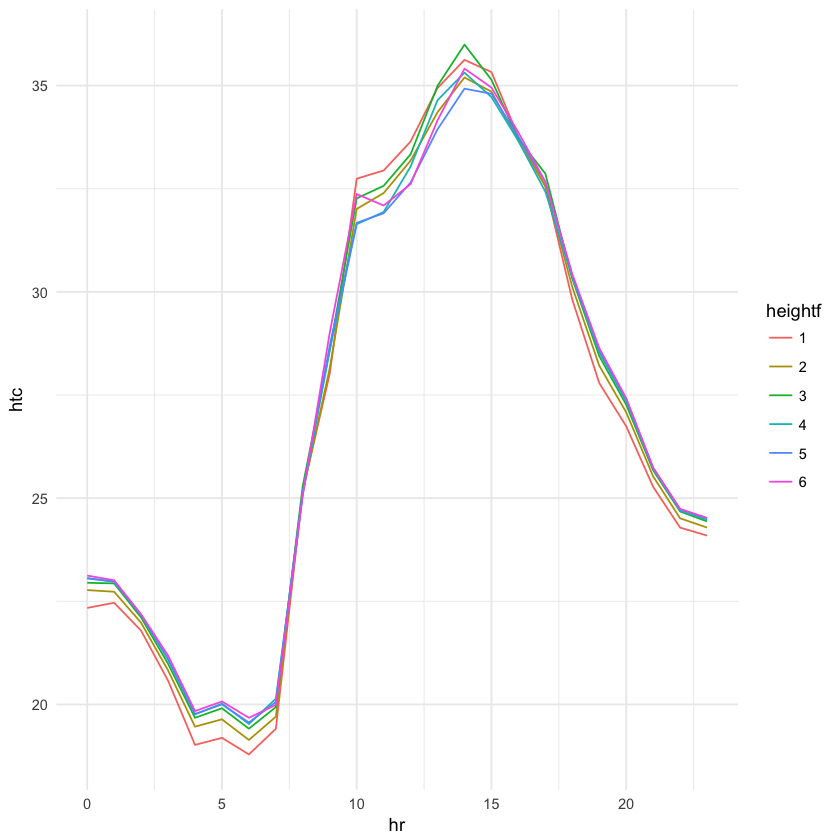

In [45]:
fieldrunPlotByIdHeight %>% group_by(date,hr, height) %>%
summarize(htc= mean(celsius)) %>% mutate(heightf= factor(height)) %>% 
filter(day(date) %in% c(18)) %>%
ggplot( aes(hr,htc,color = heightf)) + geom_line() + theme_minimal()

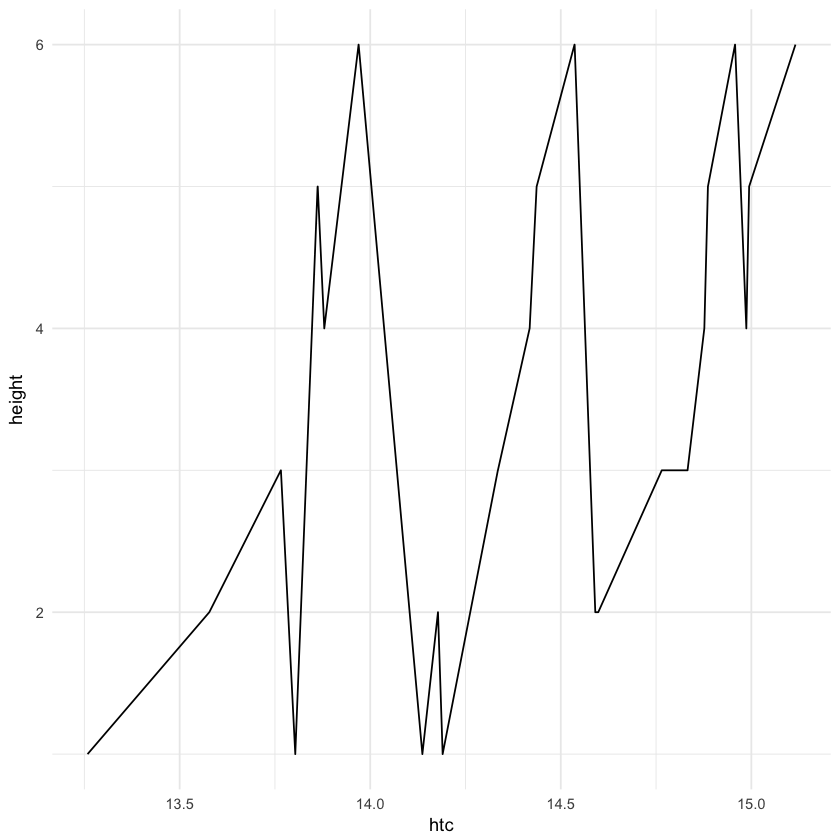

In [46]:
# lets see the temperature profile by height
fieldrunPlotByIdHeight %>% group_by(date,hr, height) %>%
summarize(htc= mean(celsius)) %>% mutate(heightf= factor(height)) %>% 
filter(day(date) %in% c(17),hr %in% c(3,4,5,6) )%>% 
ggplot( aes(htc,height)) + geom_line() + theme_minimal()

In [47]:
fieldrunPlotByIdHeight %>% group_by(date,hr, height) %>%
summarize(htc= mean(celsius)) %>% mutate(heightf= factor(height)) %>% 
filter(day(date) %in% c(17)) %>% head()

date       hr height htc      heightf
1 2016-09-17 0  1      16.07895 1      
2 2016-09-17 0  2      16.47053 2      
3 2016-09-17 0  3      16.71263 3      
4 2016-09-17 0  4      16.83211 4      
5 2016-09-17 0  5      16.85105 5      
6 2016-09-17 0  6      16.94263 6

In [48]:
head(fieldrunPlotByIdHeight)

time                id                   celsius farenh hr day year month
1 2016-09-15 15:05:58 28 94 E9 3 0 0 80 5E 27.87   82.18  15 15  2016 9    
2 2016-09-15 15:06:01 28 2C9 3 0 0 80 84   27.25   81.05  15 15  2016 9    
3 2016-09-15 15:06:05 28 CA DE 3 0 0 80 B6 27.06   80.71  15 15  2016 9    
4 2016-09-15 15:06:08 28 23 DE 3 0 0 80 9  27.19   80.94  15 15  2016 9    
5 2016-09-15 15:06:11 28 7B DF 3 0 0 80 4B 27.44   81.39  15 15  2016 9    
6 2016-09-15 15:06:14 28F 6E CF 43 16 3 29 27.37   81.27  15 15  2016 9    
  date       height
1 2016-09-15 6     
2 2016-09-15 4     
3 2016-09-15 2     
4 2016-09-15 5     
5 2016-09-15 3     
6 2016-09-15 1

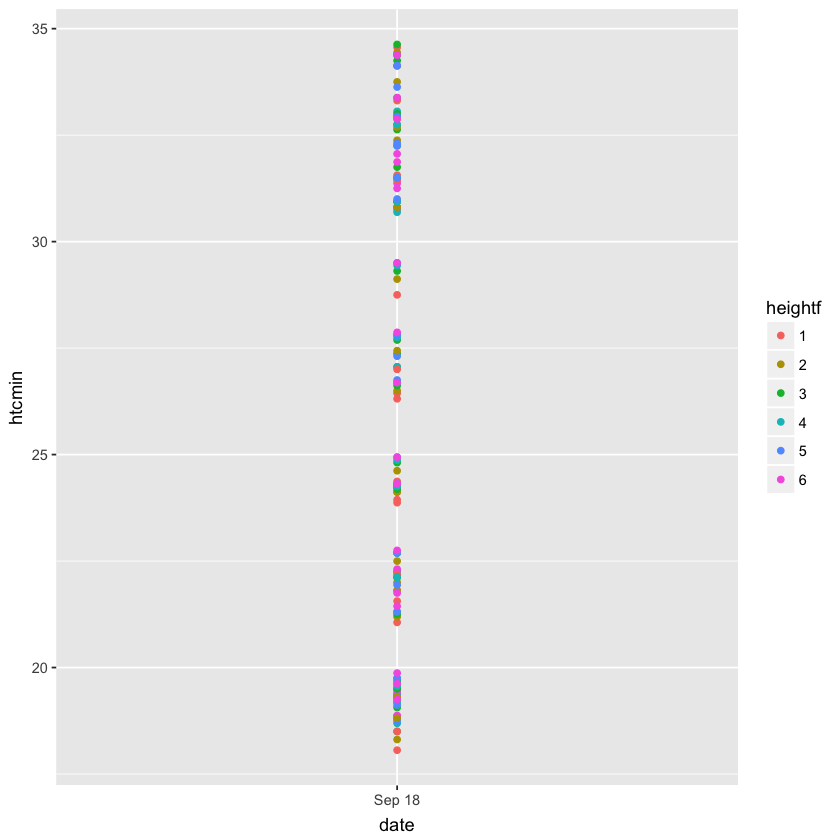

In [56]:
fieldrunPlotByIdHeight %>% group_by(date,hr, height) %>%
summarize(htcm= mean(celsius), htcmin= min(celsius),htcmax= max(celsius)) %>% mutate(heightf= factor(height)) %>% 
filter(day(date) %in% c(18)) %>% ggplot(aes(date,htcmin,color=heightf)) + geom_point()

In [83]:
fieldrunPlotByIdHeight %>% group_by(date,hr, height) %>%
summarize(htc= mean(celsius), htcmin= min(celsius),htcmax= max(celsius)) %>% 
mutate(heightf= factor(height),hour= factor(hr)) %>% 
filter(day(date) %in% c(18),hr %in% c(3,4,5,6,12,13,14,15),heightf %in% c(1,2,3))%>% head()

date       hr height htc      htcmin htcmax heightf hour
1 2016-09-18 3  1      20.57611 19.25  21.62  1       3   
2 2016-09-18 3  2      20.82444 19.50  21.81  2       3   
3 2016-09-18 3  3      20.98444 19.69  21.94  3       3   
4 2016-09-18 4  1      19.01889 18.81  19.37  1       4   
5 2016-09-18 4  2      19.46111 19.19  19.94  2       4   
6 2016-09-18 4  3      19.67611 19.31  20.25  3       4

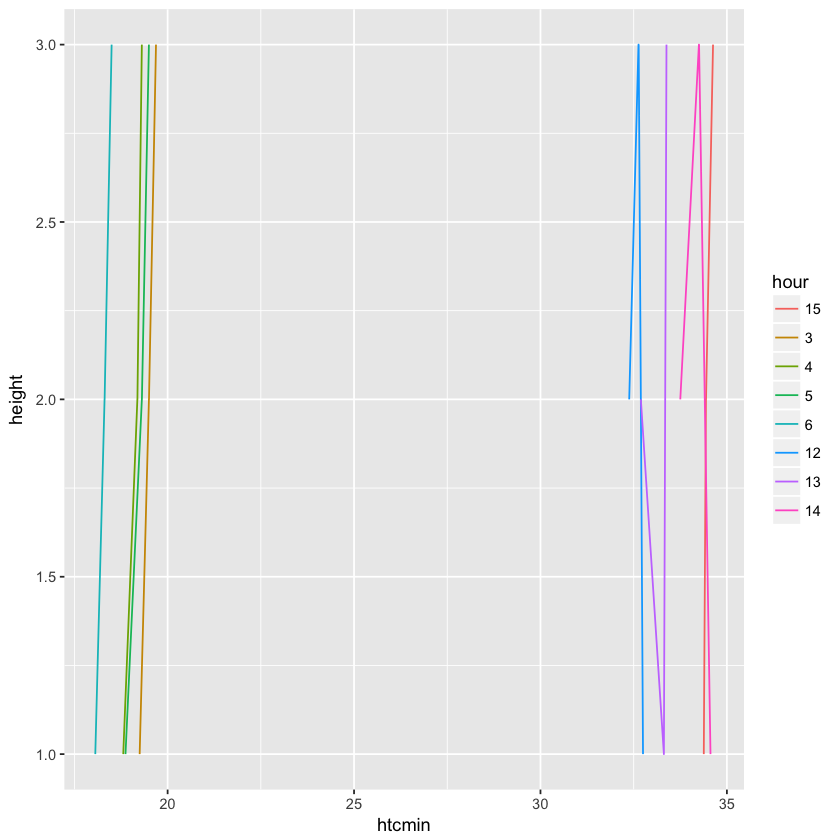

In [82]:
# lets see the temperature profile by height, for one day
fieldrunPlotByIdHeight %>% group_by(date,hr, height) %>%
summarize(htc= mean(celsius), htcmin= min(celsius),htcmax= max(celsius)) %>% 
mutate(heightf= factor(height),hour= factor(hr)) %>% 
filter(day(date) %in% c(18),hr %in% c(3,4,5,6,12,13,14,15),heightf %in% c(1,2,3))%>% 
ggplot( aes(htcmin,height, color=hour) ) + geom_line() 

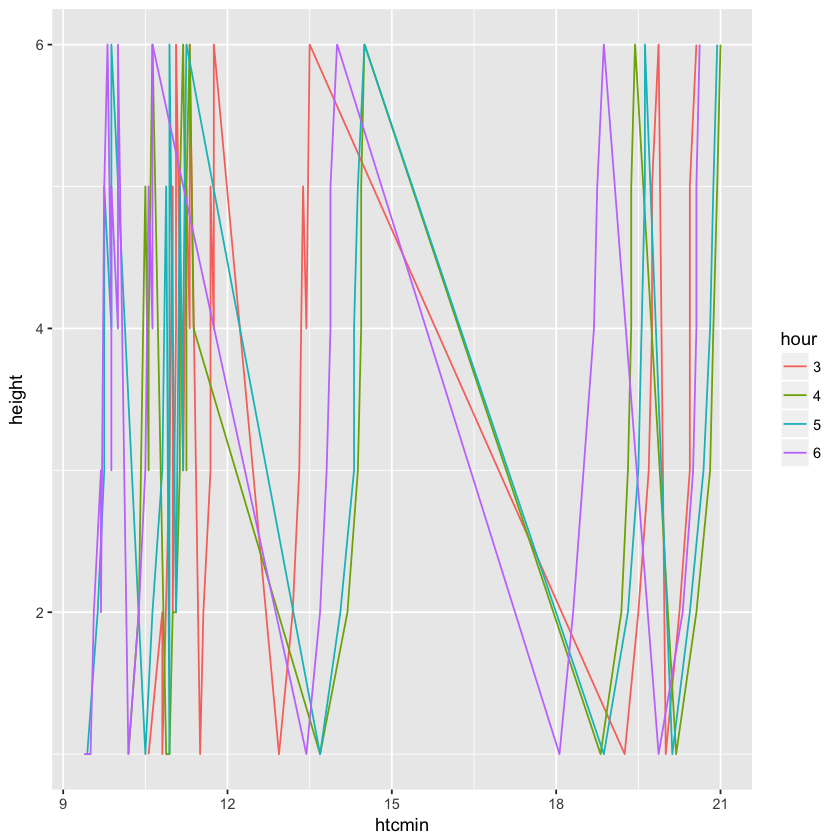

In [70]:
# lets see the temperature profile by height, for whole week
fieldrunPlotByIdHeight %>% group_by(date,hr, height) %>%
summarize(htc= mean(celsius), htcmin= min(celsius),htcmax= max(celsius)) %>% 
mutate(heightf= factor(height),hour= factor(hr)) %>% 
filter(hr %in% c(3,4,5,6))%>% 
ggplot( aes(htcmin,height, color=hour)) + geom_line() 

In [88]:
library(reshape2)
fieldrunPlotByIdHeight %>% group_by(date,hr, height) %>%
summarize(htc= mean(celsius), htcmin= min(celsius),htcmax= max(celsius)) %>% 
mutate(heightf= factor(height),hour= factor(hr)) %>% 
filter(day(date) %in% c(18),hr %in% c(3,4,5,6,12,13,14,15),heightf %in% c(1,2,3))%>%
head()

date       hr height htc      htcmin htcmax heightf hour
1 2016-09-18 3  1      20.57611 19.25  21.62  1       3   
2 2016-09-18 3  2      20.82444 19.50  21.81  2       3   
3 2016-09-18 3  3      20.98444 19.69  21.94  3       3   
4 2016-09-18 4  1      19.01889 18.81  19.37  1       4   
5 2016-09-18 4  2      19.46111 19.19  19.94  2       4   
6 2016-09-18 4  3      19.67611 19.31  20.25  3       4

In [89]:
head(fieldrunPlotByIdHeight)

time                id                   celsius farenh hr day year month
1 2016-09-15 15:05:58 28 94 E9 3 0 0 80 5E 27.87   82.18  15 15  2016 9    
2 2016-09-15 15:06:01 28 2C9 3 0 0 80 84   27.25   81.05  15 15  2016 9    
3 2016-09-15 15:06:05 28 CA DE 3 0 0 80 B6 27.06   80.71  15 15  2016 9    
4 2016-09-15 15:06:08 28 23 DE 3 0 0 80 9  27.19   80.94  15 15  2016 9    
5 2016-09-15 15:06:11 28 7B DF 3 0 0 80 4B 27.44   81.39  15 15  2016 9    
6 2016-09-15 15:06:14 28F 6E CF 43 16 3 29 27.37   81.27  15 15  2016 9    
  date       height
1 2016-09-15 6     
2 2016-09-15 4     
3 2016-09-15 2     
4 2016-09-15 5     
5 2016-09-15 3     
6 2016-09-15 1

In [90]:
library(tidyr)


Attaching package: ‘tidyr’

The following object is masked from ‘package:reshape2’:

    smiths

The following object is masked from ‘package:raster’:

    extract



In [92]:
fieldrunPlotByIdHeight %>% 
  group_by(date,hr) %>% nrow()

[1] 15172

In [161]:
fldrunsum<- fieldrunPlotByIdHeight %>% 
  group_by(date,hr) %>% summarize(meantc=mean(celsius)) %>% as.data.frame()

In [129]:
head(fldrunsum)

date       hr meantc  
1 2016-09-15 15 26.93735
2 2016-09-15 16 25.07759
3 2016-09-15 17 23.83759
4 2016-09-15 18 20.90073
5 2016-09-15 19 18.01301
6 2016-09-15 20 16.33250

In [130]:
nrow(fldrunsum)

[1] 139

In [132]:
head(fieldrunPlotByIdHeight)
spread(fieldrunPlotByIdHeight, key = height, value = celsius)

time                id                   celsius farenh hr day year month
1 2016-09-15 15:05:58 28 94 E9 3 0 0 80 5E 27.87   82.18  15 15  2016 9    
2 2016-09-15 15:06:01 28 2C9 3 0 0 80 84   27.25   81.05  15 15  2016 9    
3 2016-09-15 15:06:05 28 CA DE 3 0 0 80 B6 27.06   80.71  15 15  2016 9    
4 2016-09-15 15:06:08 28 23 DE 3 0 0 80 9  27.19   80.94  15 15  2016 9    
5 2016-09-15 15:06:11 28 7B DF 3 0 0 80 4B 27.44   81.39  15 15  2016 9    
6 2016-09-15 15:06:14 28F 6E CF 43 16 3 29 27.37   81.27  15 15  2016 9    
  date       height
1 2016-09-15 6     
2 2016-09-15 4     
3 2016-09-15 2     
4 2016-09-15 5     
5 2016-09-15 3     
6 2016-09-15 1

time                id                   farenh hr day year month
1     2016-09-15 15:05:58 28 94 E9 3 0 0 80 5E 82.18  15 15  2016 9    
2     2016-09-15 15:06:01 28 2C9 3 0 0 80 84   81.05  15 15  2016 9    
3     2016-09-15 15:06:05 28 CA DE 3 0 0 80 B6 80.71  15 15  2016 9    
4     2016-09-15 15:06:08 28 23 DE 3 0 0 80 9  80.94  15 15  2016 9    
5     2016-09-15 15:06:11 28 7B DF 3 0 0 80 4B 81.39  15 15  2016 9    
6     2016-09-15 15:06:14 28F 6E CF 43 16 3 29 81.27  15 15  2016 9    
7     2016-09-15 15:09:17 28 94 E9 3 0 0 80 5E 84.87  15 15  2016 9    
8     2016-09-15 15:09:20 28 2C9 3 0 0 80 84   81.95  15 15  2016 9    
9     2016-09-15 15:09:23 28 CA DE 3 0 0 80 B6 81.16  15 15  2016 9    
10    2016-09-15 15:09:26 28 23 DE 3 0 0 80 9  85.77  15 15  2016 9    
11    2016-09-15 15:09:29 28 7B DF 3 0 0 80 4B 85.89  15 15  2016 9    
12    2016-09-15 15:09:32 28F 6E CF 43 16 3 29 90.05  15 15  2016 9    
13    2016-09-15 15:12:34 28 94 E9 3 0 0 80 5E 83.64  15 15  2016 9    
14    2016-09-15 15:12:38 28 2C9 3 0 0 80 84   82.74  15 15  2016 9    
15    2016-09-15 15:12:41 28 CA DE 3 0 0 80 B6 81.84  15 15  2016 9    
16    2016-09-15 15:12:44 28 23 DE 3 0 0 80 9  84.54  15 15  2016 9    
17    2016-09-15 15:12:47 28 7B DF 3 0 0 80 4B 84.31  15 15  2016 9    
18    2016-09-15 15:12:50 28F 6E CF 43 16 3 29 95.79  15 15  2016 9    
19    2016-09-15 15:15:52 28 94 E9 3 0 0 80 5E 81.27  15 15  2016 9    
20    2016-09-15 15:15:55 28 2C9 3 0 0 80 84   83.41  15 15  2016 9    
21    2016-09-15 15:15:58 28 CA DE 3 0 0 80 B6 82.96  15 15  2016 9    
22    2016-09-15 15:16:02 28 23 DE 3 0 0 80 9  82.40  15 15  2016 9    
23    2016-09-15 15:16:05 28 7B DF 3 0 0 80 4B 81.50  15 15  2016 9    
24    2016-09-15 15:16:08 28F 6E CF 43 16 3 29 85.44  15 15  2016 9    
25    2016-09-15 15:19:10 28 94 E9 3 0 0 80 5E 82.51  15 15  2016 9    
26    2016-09-15 15:19:13 28 2C9 3 0 0 80 84   83.30  15 15  2016 9    
27    2016-09-15 15:19:16 28 CA DE 3 0 0 80 B6 82.74  15 15  2016 9    
28    2016-09-15 15:19:19 28 23 DE 3 0 0 80 9  82.62  15 15  2016 9    
29    2016-09-15 15:19:22 28 7B DF 3 0 0 80 4B 81.95  15 15  2016 9    
30    2016-09-15 15:19:26 28F 6E CF 43 16 3 29 81.16  15 15  2016 9    
⋮     ⋮                   ⋮                    ⋮      ⋮  ⋮   ⋮    ⋮    
15143 2016-09-21 09:41:47 28 7B DF 3 0 0 80 4B 57.88  9  21  2016 9    
15144 2016-09-21 09:41:50 28F 6E CF 43 16 3 29 59.34  9  21  2016 9    
15145 2016-09-21 09:44:52 28 94 E9 3 0 0 80 5E 58.55  9  21  2016 9    
15146 2016-09-21 09:44:55 28 2C9 3 0 0 80 84   60.35  9  21  2016 9    
15147 2016-09-21 09:44:58 28 CA DE 3 0 0 80 B6 58.55  9  21  2016 9    
15148 2016-09-21 09:45:01 28 23 DE 3 0 0 80 9  60.13  9  21  2016 9    
15149 2016-09-21 09:45:04 28 7B DF 3 0 0 80 4B 59.45  9  21  2016 9    
15150 2016-09-21 09:45:07 28F 6E CF 43 16 3 29 59.11  9  21  2016 9    
15151 2016-09-21 09:48:10 28 94 E9 3 0 0 80 5E 57.31  9  21  2016 9    
15152 2016-09-21 09:48:13 28 2C9 3 0 0 80 84   59.34  9  21  2016 9    
15153 2016-09-21 09:48:16 28 CA DE 3 0 0 80 B6 58.66  9  21  2016 9    
15154 2016-09-21 09:48:19 28 23 DE 3 0 0 80 9  59.11  9  21  2016 9    
15155 2016-09-21 09:48:22 28 7B DF 3 0 0 80 4B 59.00  9  21  2016 9    
15156 2016-09-21 09:48:25 28F 6E CF 43 16 3 29 59.90  9  21  2016 9    
15157 2016-09-21 09:51:27 28 94 E9 3 0 0 80 5E 58.10  9  21  2016 9    
15158 2016-09-21 09:51:30 28 2C9 3 0 0 80 84   60.24  9  21  2016 9    
15159 2016-09-21 09:51:34 28 CA DE 3 0 0 80 B6 60.24  9  21  2016 9    
15160 2016-09-21 09:51:37 28 23 DE 3 0 0 80 9  59.34  9  21  2016 9    
15161 2016-09-21 09:51:40 28 7B DF 3 0 0 80 4B 60.13  9  21  2016 9    
15162 2016-09-21 09:51:43 28F 6E CF 43 16 3 29 61.93  9  21  2016 9    
15163 2016-09-21 09:54:45 28 94 E9 3 0 0 80 5E 60.35  9  21  2016 9    
15164 2016-09-21 09:54:48 28 2C9 3 0 0 80 84   61.03  9  21  2016 9    
15165 2016-09-21 09:54:51 28 CA DE 3 0 0 80 B6 62.15  9  21  2016 9    
15166 2016-09-21 09:54:54 28 23 DE 3 0 0 80 9 

In [136]:
sdf <- spread(fieldrunPlotByIdHeight, key = height, value = celsius)%>% as.data.frame()


In [140]:
names(sdf)

[1] "time"   "id"     "farenh" "hr"     "day"    "year"   "month"  "date"  
 [9] "one"    "two"    "three"  "four"   "five"   "six"

In [139]:
names(sdf)<- c('time', 'id' ,'farenh' ,'hr', 'day' ,'year' ,'month', 'date', 'one', 'two' ,'three', 'four', 'five', 'six')

Warning message:
“Removed 12644 rows containing missing values (geom_point).”

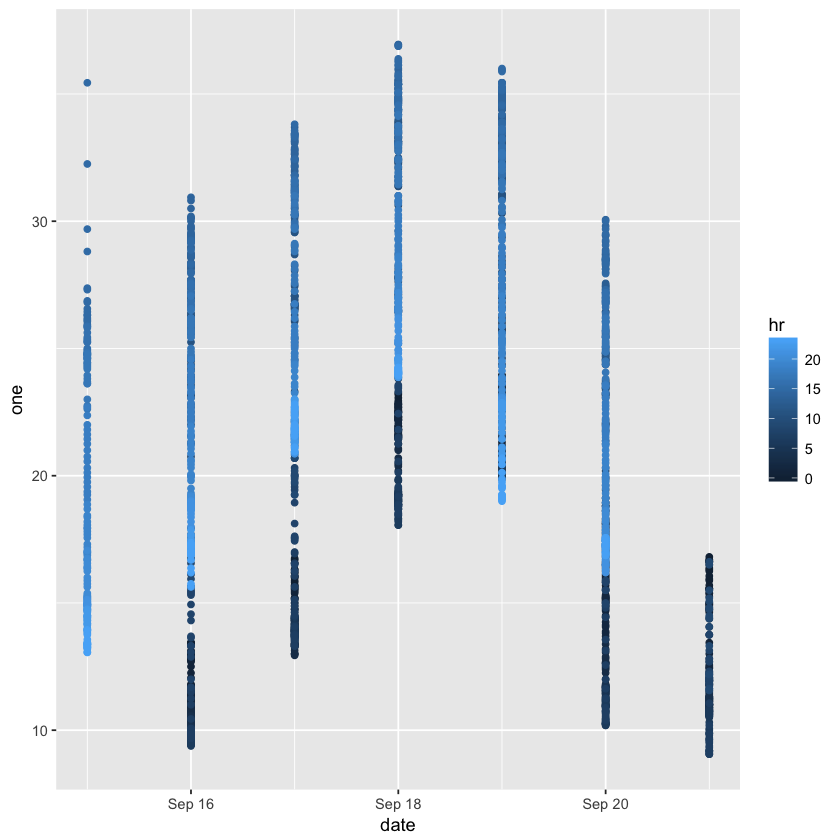

In [143]:
sdf %>% ggplot(aes(date,one,color=hr)) + geom_point()

In [144]:
fieldrunexp<- spread(fieldrunPlotByIdHeight, key = height, value = celsius) %>% as.data.frame()

In [147]:
str(sdf)

'data.frame':	15172 obs. of  14 variables:
 $ time  : POSIXct, format: "2016-09-15 15:05:58" "2016-09-15 15:06:01" ...
 $ id    : Factor w/ 6 levels "28 23 DE 3 0 0 80 9",..: 4 2 5 1 3 6 4 2 5 1 ...
 $ farenh: num  82.2 81 80.7 80.9 81.4 ...
 $ hr    : int  15 15 15 15 15 15 15 15 15 15 ...
 $ day   : int  15 15 15 15 15 15 15 15 15 15 ...
 $ year  : num  2016 2016 2016 2016 2016 ...
 $ month : num  9 9 9 9 9 9 9 9 9 9 ...
 $ date  : Date, format: "2016-09-15" "2016-09-15" ...
 $ one   : num  NA NA NA NA NA ...
 $ two   : num  NA NA 27.1 NA NA ...
 $ three : num  NA NA NA NA 27.4 ...
 $ four  : num  NA 27.2 NA NA NA ...
 $ five  : num  NA NA NA 27.2 NA ...
 $ six   : num  27.9 NA NA NA NA ...


In [153]:
sdf %>% select(date, hr, one) %>% na.omit() %>% group_by(date,hr) %>% summarise(mtcone=mean(one)) %>% nrow()

[1] 139

In [166]:
str(fldrunsum)

'data.frame':	139 obs. of  4 variables:
 $ date  : Date, format: "2016-09-15" "2016-09-15" ...
 $ hr    : int  15 16 17 18 19 20 21 22 23 0 ...
 $ meantc: num  26.9 25.1 23.8 20.9 18 ...
 $ one   : num  27.7 25.1 24 20.7 17.6 ...


In [163]:
# Add height one feet
fldrunsum$one <- sdf %>% select(date, hr, one) %>% na.omit() %>% group_by(date,hr) %>%
summarise(mtcone=mean(one)) %>% select(mtcone) %>% as.data.frame()

Adding missing grouping variables: `date`


In [165]:
fldrunsum$one <- fldrunsum$one$mtcone

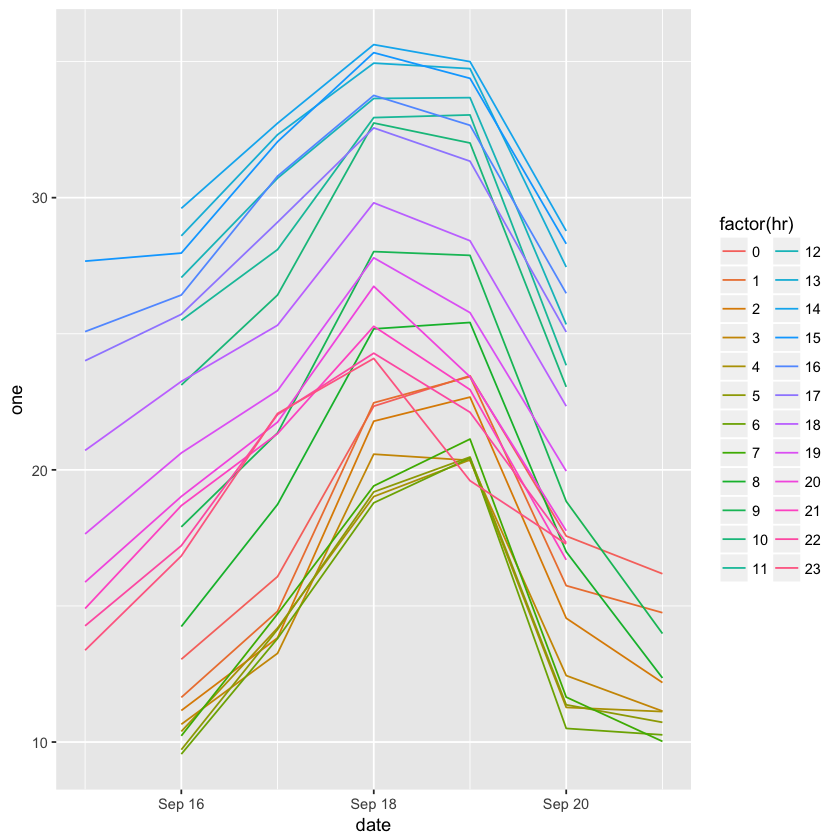

In [171]:
fldrunsum %>% ggplot(aes(date,one,color=factor(hr))) + geom_line()